In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

## 데이터 가져오기

In [66]:
df = pd.read_csv("com_data.csv")
df.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
5,508810,239047,2018,3,528980,5
6,365169,3650711,2016,4,570320,3
7,189562,7119908,2016,1,1276900,6
8,133518,18642904,2018,10,16844840,75
9,190847,2367117,2015,12,2354660,8


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [68]:
df['연월'] = pd.to_datetime(df['년도'].astype(str) + df['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')
df.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,233757,41688077,2018,7,8912380,36,201807
1,123464,1760695,2018,3,942380,5,201803
2,342124,3221341,2018,7,781180,4,201807
3,386420,4815584,2015,11,3795900,14,201511
4,129243,9799736,2018,10,40724680,151,201810
5,508810,239047,2018,3,528980,5,201803
6,365169,3650711,2016,4,570320,3,201604
7,189562,7119908,2016,1,1276900,6,201601
8,133518,18642904,2018,10,16844840,75,201810
9,190847,2367117,2015,12,2354660,8,201512


## 연도별 매출액 확인

<AxesSubplot:xlabel='연월', ylabel='연매출액'>

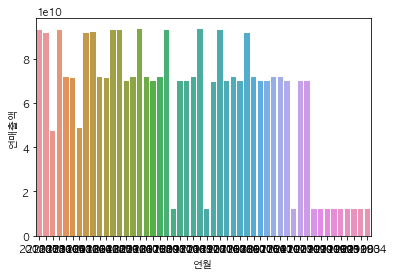

In [69]:
sns.barplot(data=df, x='연월', y='연매출액', ci=None, estimator=sum)

## 회사 별 연매출액 순위 보기

In [70]:
group = df.groupby(df['회사ID']).sum()
group

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
63,135945352752,24216,78,4921538740,12086
95,7883369244,24216,78,2578054120,6492
102,5941271504,16144,68,1390156180,6017
295,670213576,16144,68,618496280,2076
414,236793228,24216,78,931082320,2971
...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33
2437574,214016,2018,5,636740,3
2693684,1428456,12114,57,2628720,18


In [71]:
profit = group.sort_values(by=['연매출액'], ascending=False)
profit.head(50)

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


In [72]:
profit_filtered = profit['연매출액'] > 5589816090
len(profit[profit_filtered])

49

In [73]:
top_49 = profit[profit_filtered]
top_49

,연매출액,년도,월,월별_연금보험료,월별_직원수
회사ID,,,,,
419945,400950111264,96840,312,40263116800,131735
227415,201953222900,76642,257,32391916020,87340
227414,173560341862,76642,257,33048032220,88314
419977,153075084000,72612,234,14079414180,46279
294649,145796011006,76642,257,3911712480,10278
63,135945352752,24216,78,4921538740,12086
419998,127382131032,72612,234,10894240960,29248
126831,76738090564,76642,257,8652008820,22195
381180,55466949156,76642,257,2423602580,6483


## 데이터 기간 확인해보기

In [74]:
df_period = df.sort_values(by=['년도', '월'], ascending=True)
df_period.head(10)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
3,386420,4815584,2015,11,3795900,14,201511
93,145900,4753036,2015,11,4153140,25,201511
97,139359,50216484,2015,11,10547240,39,201511
193,135634,13168146,2015,11,10895560,44,201511
327,190720,3680361,2015,11,945900,4,201511
349,137784,13942269,2015,11,11220820,49,201511
485,179050,4134391,2015,11,2480420,11,201511
583,514711,667698,2015,11,998160,8,201511
592,404139,8694049,2015,11,16557740,96,201511
601,228130,17092968,2015,11,9067300,37,201511


In [75]:
value = df.loc[df['년도'] == 2019]
value2019 = value.sort_values(by=['연매출액','월별_연금보험료'], ascending=False)
value2019.head(20)

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
71565,419945,10058868796,2019,10,953121400,2871,201910
6086,419945,10058868796,2019,12,952530380,2872,201912
35822,419945,10058868796,2019,11,952045040,2870,201911
89842,419945,10058868796,2019,9,933819300,2779,201909
25614,419945,10058868796,2019,7,928921380,2762,201907
70918,419945,10058868796,2019,8,927833840,2753,201908
88487,419945,10058868796,2019,6,870767520,2757,201906
13109,419945,10058868796,2019,4,870665760,2765,201904
53151,419945,10058868796,2019,5,870631680,2770,201905
60354,419945,10058868796,2019,2,867816240,2745,201902


In [76]:
len(value)

852

In [77]:
value_2015 = df.loc[df['년도'] == 2015]
len(value_2015)

3586

In [78]:
value_2016 = df.loc[df['년도'] == 2016]
len(value_2016)

37685

In [79]:
value_2017 = df.loc[df['년도'] == 2017]
len(value_2017)

17806

In [80]:
value_2018 = df.loc[df['년도'] == 2018]
len(value_2018)

39872

In [81]:
value_2019 = df.loc[df['년도'] == 2019]
len(value_2019)

852

## 각 회사별 평균 연봉 월급 알아보기

In [82]:
group['인당보험료'] = group['월별_연금보험료'] / group['월별_직원수']
print(group['인당보험료'])

회사ID
63        407209.89078
95        397112.46457
102       231038.08875
295       297926.91715
414       313390.21205
              ...     
2400284   223893.33333
2437574   212246.66667
2693684   146040.00000
3312354   437400.00000
5159723   251456.00000
Name: 인당보험료, Length: 5000, dtype: float64


## 국민연금 보험료는 9%, 평균월급 알아보기

In [83]:
group['평균월급'] = group['인당보험료'] / 0.09
print(group['평균월급'])

회사ID
63        4524554.34203
95        4412360.71746
102       2567089.87498
295       3310299.07943
414       3482113.46722
               ...     
2400284   2487703.70370
2437574   2358296.29630
2693684   1622666.66667
3312354   4860000.00000
5159723   2793955.55556
Name: 평균월급, Length: 5000, dtype: float64


/Users/tk/miniforge3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


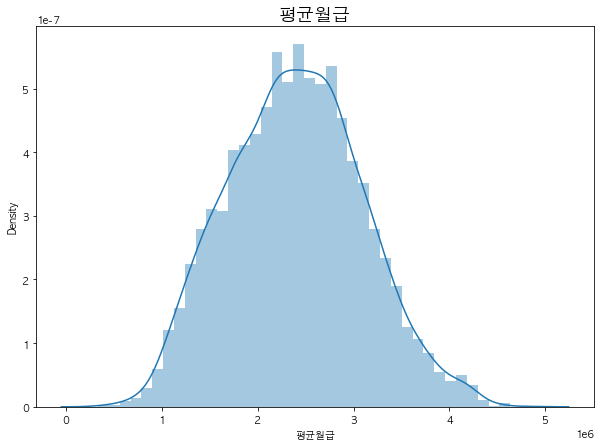

In [84]:
plt.figure(figsize=(10, 7))
sns.distplot(group.loc[group['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

## 평균연봉 구하기 (12달)

In [85]:
group['평균연봉'] = group['평균월급'] * 12

In [86]:
group['평균연봉'].notnull().sum()
print(group['평균연봉'])

회사ID
63        54294652.10436
95        52948328.60957
102       30805078.49981
295       39723588.95311
414       41785361.60664
               ...      
2400284   29852444.44444
2437574   28299555.55556
2693684   19472000.00000
3312354   58320000.00000
5159723   33527466.66667
Name: 평균연봉, Length: 5000, dtype: float64


/Users/tk/miniforge3/envs/project/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


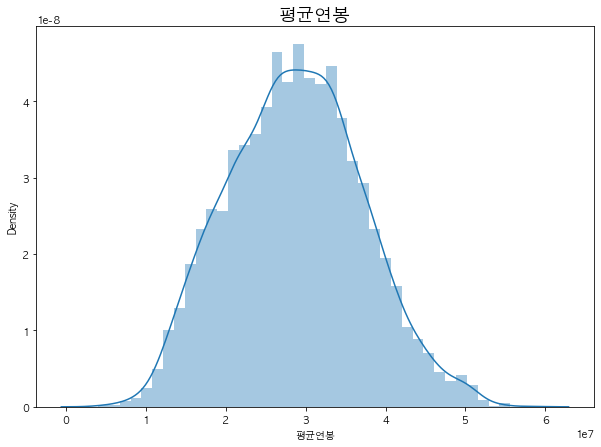

In [87]:
plt.figure(figsize=(10, 7))
sns.distplot(group.loc[group['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

## 월 보험료, 월 직원수 포함시켜서 데이터프레임 만들기

In [88]:
group['평균_월_보험료'] = group['월별_연금보험료'] / group['월']
print(group['평균_월_보험료'])

회사ID
63        63096650.51282
95        33051975.89744
102       20443473.23529
295        9095533.52941
414       11936952.82051
               ...      
2400284     150785.30612
2437574     127348.00000
2693684      46117.89474
3312354     131220.00000
5159723     104773.33333
Name: 평균_월_보험료, Length: 5000, dtype: float64


In [89]:
group['평균_월_직원수'] = group['월별_직원수'] / group['월']
print(group['평균_월_직원수'])

회사ID
63        154.94872
95         83.23077
102        88.48529
295        30.52941
414        38.08974
             ...   
2400284     0.67347
2437574     0.60000
2693684     0.31579
3312354     0.30000
5159723     0.41667
Name: 평균_월_직원수, Length: 5000, dtype: float64


In [90]:
group['평균_연매출액'] = group['연매출액'] / group['년도']
group

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수,평균_연매출액
회사ID,,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,5613864.91378
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077,325543.82408
102,5941271504,16144,68,1390156180,6017,231038.08875,2567089.87498,30805078.49981,20443473.23529,88.48529,368017.31318
295,670213576,16144,68,618496280,2076,297926.91715,3310299.07943,39723588.95311,9095533.52941,30.52941,41514.71606
414,236793228,24216,78,931082320,2971,313390.21205,3482113.46722,41785361.60664,11936952.82051,38.08974,9778.37909
...,...,...,...,...,...,...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33,223893.33333,2487703.70370,29852444.44444,150785.30612,0.67347,626.06838
2437574,214016,2018,5,636740,3,212246.66667,2358296.29630,28299555.55556,127348.00000,0.60000,106.05352
2693684,1428456,12114,57,2628720,18,146040.00000,1622666.66667,19472000.00000,46117.89474,0.31579,117.91778


In [91]:
group['margin'] = group['평균_연매출액'] * 1000 - group['평균연봉']
group

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,5613864.91378,5559570261.67165
95,7883369244,24216,78,2578054120,6492,397112.46457,4412360.71746,52948328.60957,33051975.89744,83.23077,325543.82408,272595495.47368
102,5941271504,16144,68,1390156180,6017,231038.08875,2567089.87498,30805078.49981,20443473.23529,88.48529,368017.31318,337212234.68156
295,670213576,16144,68,618496280,2076,297926.91715,3310299.07943,39723588.95311,9095533.52941,30.52941,41514.71606,1791127.10239
414,236793228,24216,78,931082320,2971,313390.21205,3482113.46722,41785361.60664,11936952.82051,38.08974,9778.37909,-32006982.51844
...,...,...,...,...,...,...,...,...,...,...,...,...
2400284,8843842,14126,49,7388480,33,223893.33333,2487703.70370,29852444.44444,150785.30612,0.67347,626.06838,-29226376.05991
2437574,214016,2018,5,636740,3,212246.66667,2358296.29630,28299555.55556,127348.00000,0.60000,106.05352,-28193502.03722
2693684,1428456,12114,57,2628720,18,146040.00000,1622666.66667,19472000.00000,46117.89474,0.31579,117.91778,-19354082.21892


In [92]:
group.sort_values('margin', ascending=False).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,5613864.91378,5559570261.67165
419945,400950111264,96840,312,40263116800,131735,305637.20196,3395968.91065,40751626.92780,129048451.28205,422.22756,4140335.72144,4099584094.50963
227415,201953222900,76642,257,32391916020,87340,370871.49095,4120794.34394,49449532.12732,126038583.73541,339.84436,2635020.26174,2585570729.60907
227414,173560341862,76642,257,33048032220,88314,374210.56933,4157895.21480,49894742.57762,128591565.05837,343.63424,2264559.14332,2214664400.73805
419977,153075084000,72612,234,14079414180,46279,304229.00624,3380322.29161,40563867.49930,60168436.66667,197.77350,2108123.78119,2067559913.69389
294649,145796011006,76642,257,3911712480,10278,380590.82312,4228786.92353,50745443.08231,15220671.12840,39.99222,1902299.14415,1851553701.06842
419998,127382131032,72612,234,10894240960,29248,372478.15098,4138646.12205,49663753.46462,46556585.29915,124.99145,1754284.84317,1704621089.70179
126831,76738090564,76642,257,8652008820,22195,389817.92386,4331310.26507,51975723.18090,33665403.96887,86.36187,1001253.75857,949278035.38490
420008,52800160380,72612,234,6593558880,17627,374060.18494,4156224.27715,49874691.32581,28177602.05128,75.32906,727154.74550,677280054.17081


In [93]:
group.sort_values('margin', ascending=True).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,
3312354,7257815,10095,50,6561000,15,437400.00000,4860000.00000,58320000.00000,131220.00000,0.30000,718.95146,-57601048.53888
283380,15855408,24216,78,19623240,48,408817.50000,4542416.66667,54509000.00000,251580.00000,0.61538,654.74926,-53854250.74331
416507,15938388,24216,78,20439000,50,408780.00000,4542000.00000,54504000.00000,262038.46154,0.64103,658.17592,-53845824.08325
557976,167802,6054,33,4741100,12,395091.66667,4389907.40741,52678888.88889,143669.69697,0.36364,27.71754,-52651171.34677
34029,20591484,24216,78,40144700,103,389754.36893,4330604.09924,51967249.19094,514675.64103,1.32051,850.32557,-51116923.62107
202077,11092488,24216,78,13869840,36,385273.33333,4280814.81481,51369777.77778,177818.46154,0.46154,458.06442,-50911713.35756
182961,6187548,24192,78,25570680,67,381651.94030,4240577.11443,50886925.37313,327829.23077,0.85897,255.76835,-50631157.01996
113263,4385801,14126,63,16793280,44,381665.45455,4240727.27273,50888727.27273,266560.00000,0.69841,310.47721,-50578250.06757
29171,4908000,24216,78,49788360,131,380063.81679,4222931.29771,50675175.57252,638312.30769,1.67949,202.67592,-50472499.65577


## 스타트업 특성상 투자가 많이 이루어져야 하기 때문에, 마진이 높은 기업은 대기업 일 확률이 높다

In [94]:
group.sort_values('연매출액', ascending=False).head(10)

,연매출액,년도,월,월별_연금보험료,월별_직원수,인당보험료,평균월급,평균연봉,평균_월_보험료,평균_월_직원수,평균_연매출액,margin
회사ID,,,,,,,,,,,,
419945,400950111264,96840,312,40263116800,131735,305637.20196,3395968.91065,40751626.92780,129048451.28205,422.22756,4140335.72144,4099584094.50963
227415,201953222900,76642,257,32391916020,87340,370871.49095,4120794.34394,49449532.12732,126038583.73541,339.84436,2635020.26174,2585570729.60907
227414,173560341862,76642,257,33048032220,88314,374210.56933,4157895.21480,49894742.57762,128591565.05837,343.63424,2264559.14332,2214664400.73805
419977,153075084000,72612,234,14079414180,46279,304229.00624,3380322.29161,40563867.49930,60168436.66667,197.77350,2108123.78119,2067559913.69389
294649,145796011006,76642,257,3911712480,10278,380590.82312,4228786.92353,50745443.08231,15220671.12840,39.99222,1902299.14415,1851553701.06842
63,135945352752,24216,78,4921538740,12086,407209.89078,4524554.34203,54294652.10436,63096650.51282,154.94872,5613864.91378,5559570261.67165
419998,127382131032,72612,234,10894240960,29248,372478.15098,4138646.12205,49663753.46462,46556585.29915,124.99145,1754284.84317,1704621089.70179
126831,76738090564,76642,257,8652008820,22195,389817.92386,4331310.26507,51975723.18090,33665403.96887,86.36187,1001253.75857,949278035.38490
381180,55466949156,76642,257,2423602580,6483,373839.66991,4153774.11007,49845289.32079,9430360.23346,25.22568,723714.79288,673869503.56040


## 매출의 증가율이 높은 기업을 알아보자

In [95]:
## 중복되는 회사 id 없이 출력
old_name = df['회사ID']
name = []
for v in old_name:
    if v not in name:
        name.append(v)
print(name)

[233757, 123464, 342124, 386420, 129243, 508810, 365169, 189562, 133518, 190847, 36600, 65866, 295938, 311326, 101956, 230217, 182436, 193047, 366033, 129310, 124181, 94416, 137755, 238034, 315511, 226128, 247515, 450042, 478831, 169493, 233078, 182239, 304228, 187137, 76026, 395238, 425073, 392674, 150798, 316294, 247210, 442467, 124581, 294790, 163684, 165739, 135071, 189631, 388181, 268326, 263039, 178725, 192812, 29091, 158642, 231080, 137166, 470702, 234912, 197966, 319414, 233340, 253684, 415920, 231576, 440094, 247750, 322239, 396881, 383174, 158695, 507625, 236448, 242698, 473265, 381643, 432911, 450983, 394038, 150966, 314638, 420304, 209668, 211036, 440134, 125779, 335237, 148368, 254865, 217412, 220782, 379016, 145900, 165530, 359671, 470994, 139359, 237640, 246381, 155953, 231383, 274003, 234949, 329559, 348203, 169318, 87526, 451740, 367989, 387268, 233643, 224957, 89734, 194646, 434443, 219981, 142671, 343402, 410875, 207614, 308692, 430512, 134715, 259682, 238454, 273819

In [96]:
data = df.sort_values(by=['회사ID', '년도', '월'], axis=0)
data.reset_index(drop=True, inplace=True)
data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,63,11328779396,2018,1,403119840,1006,201801
1,63,11328779396,2018,2,406770960,1018,201802
2,63,11328779396,2018,3,404826240,1013,201803
3,63,11328779396,2018,4,404211800,1012,201804
4,63,11328779396,2018,5,400339640,1002,201805
...,...,...,...,...,...,...,...
99796,3312354,1451563,2019,9,1312200,3,201909
99797,3312354,1451563,2019,10,1312200,3,201910
99798,3312354,1451563,2019,11,1312200,3,201911
99799,3312354,1451563,2019,12,1312200,3,201912


### 연매출액이 500억 이상 되는 회사들로 분석해보자

In [103]:
data = data[data['연매출액']>=50000000]
data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
0,63,11328779396,2018,1,403119840,1006,201801
1,63,11328779396,2018,2,406770960,1018,201802
2,63,11328779396,2018,3,404826240,1013,201803
3,63,11328779396,2018,4,404211800,1012,201804
4,63,11328779396,2018,5,400339640,1002,201805
...,...,...,...,...,...,...,...
99589,630190,657402850,2018,8,352245700,902,201808
99590,630190,657402850,2018,9,356008880,915,201809
99591,630190,657402850,2018,10,362167300,936,201810
99592,630190,657402850,2018,11,371085480,965,201811


### 500억 기준 데이터가 있는 기업들을 년도별로 구분해서 매출액 증가 추이확인

In [104]:
two_years =[] 
three_years =[] 
four_years =[]  
for i in range(len(name)):
    years = data.loc[data['회사ID']==name[i]]['년도']
    years = list(set(years))
    if len(years) == 2:
        two_years.append(name[i])
    if len(years) == 3:
        three_years.append(name[i])
    if len(years) == 4:
        four_years.append(name[i])
    else:
        continue

print('2개년도 데이터가 있는 기업: ', len(two_years))
print('3개년도 데이터가 있는 기업: ', len(three_years))
print('4개년도 데이터가 있는 기업: ', len(four_years))

2개년도 데이터가 있는 기업:  15
3개년도 데이터가 있는 기업:  20
4개년도 데이터가 있는 기업:  63


## 각각 2,3,4개년도 데이터 기업의 매출액 증가 추이 확인

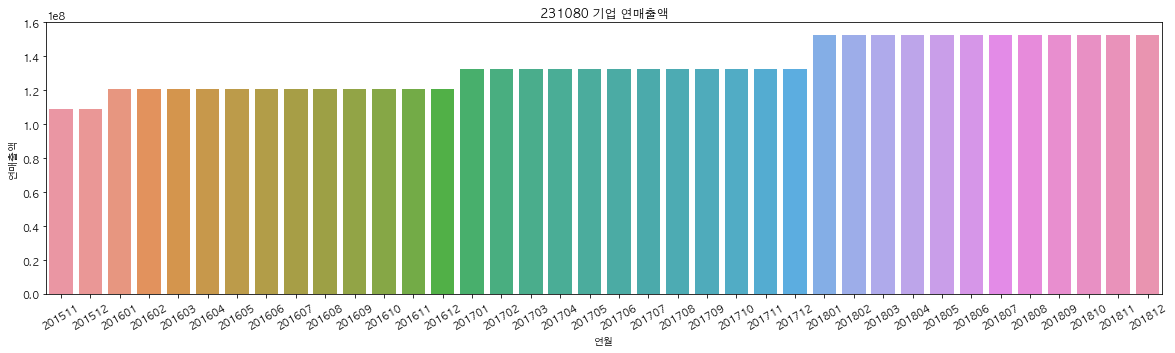

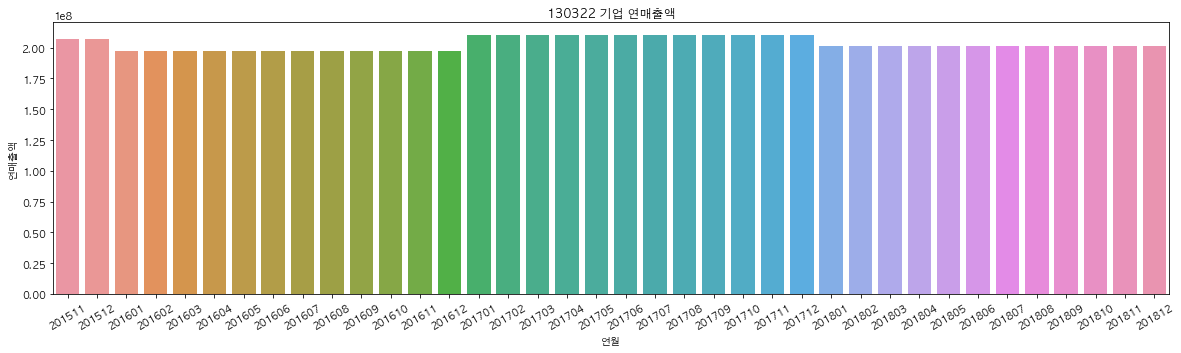

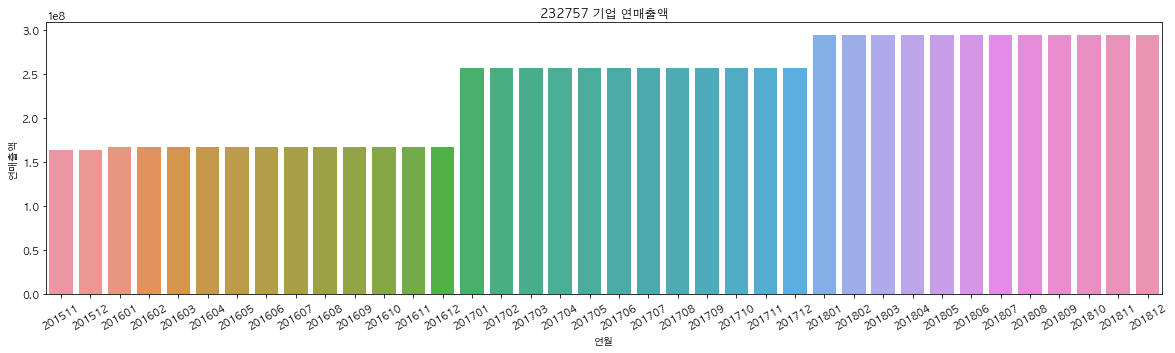

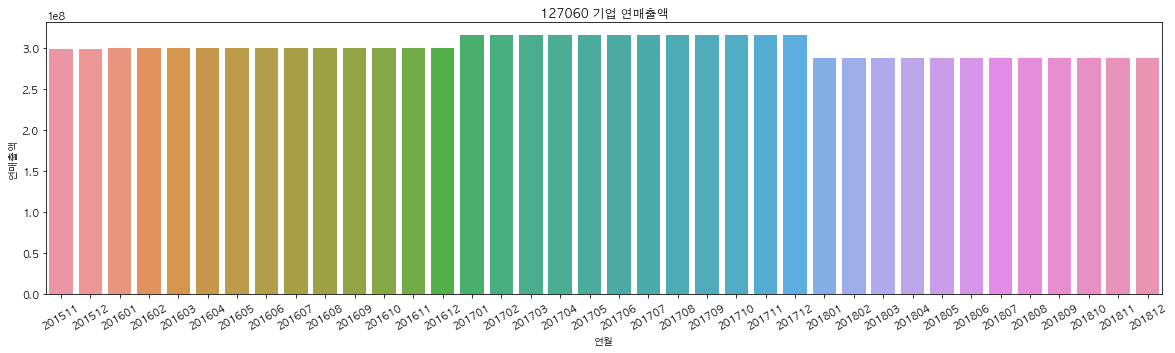

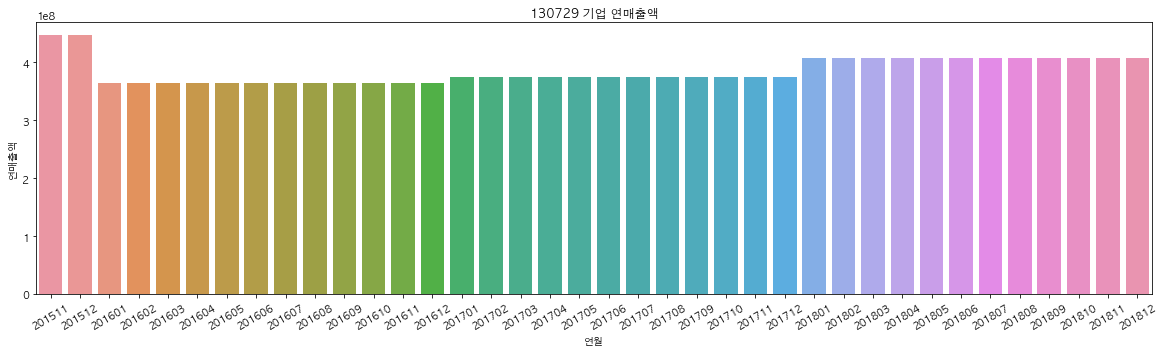

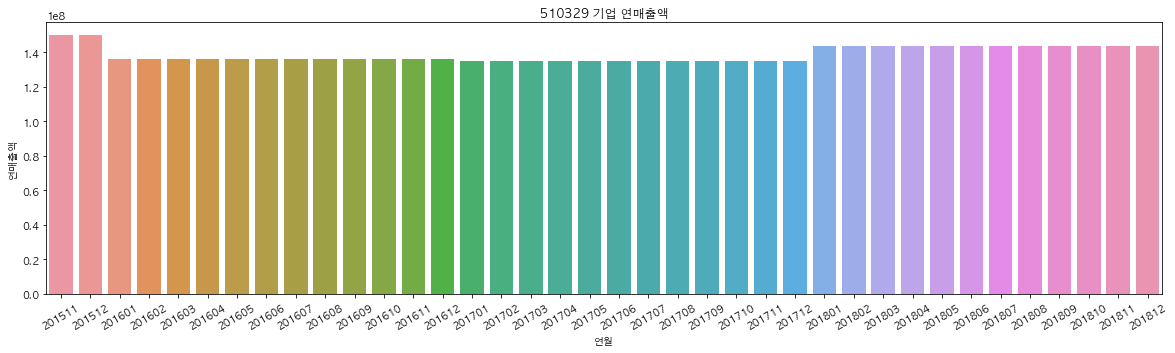

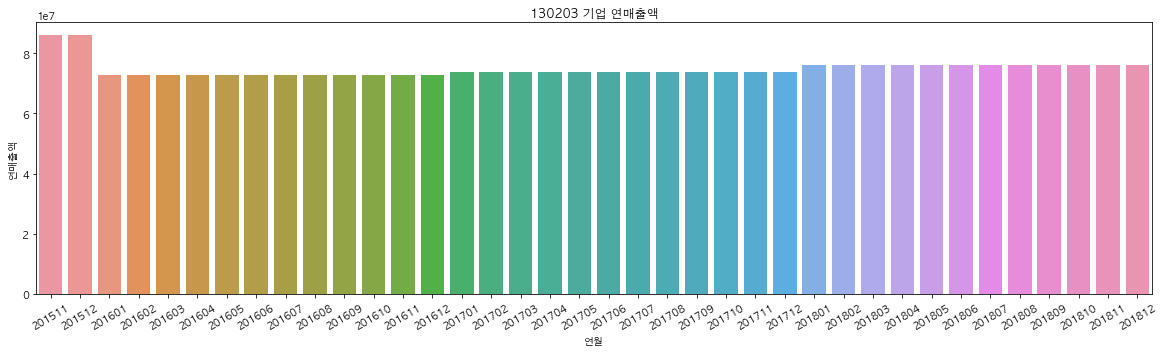

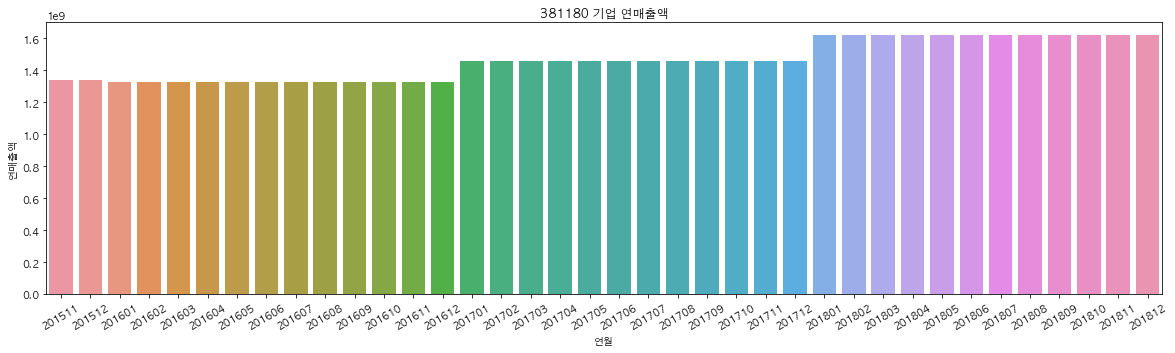

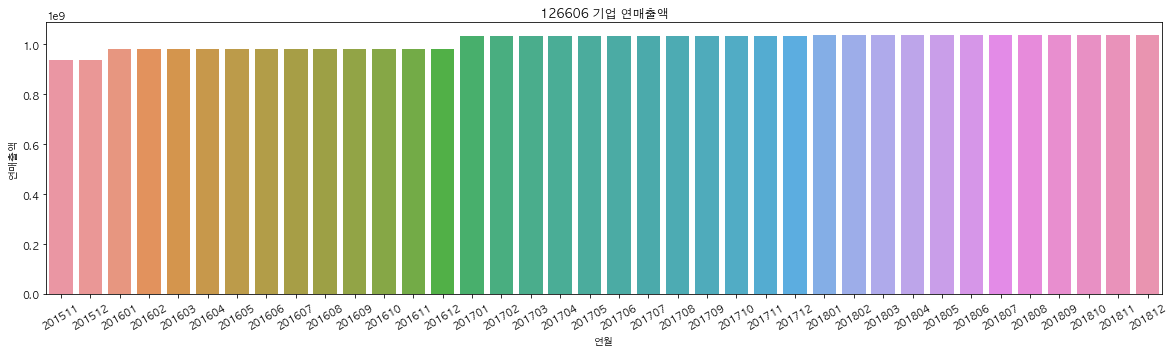

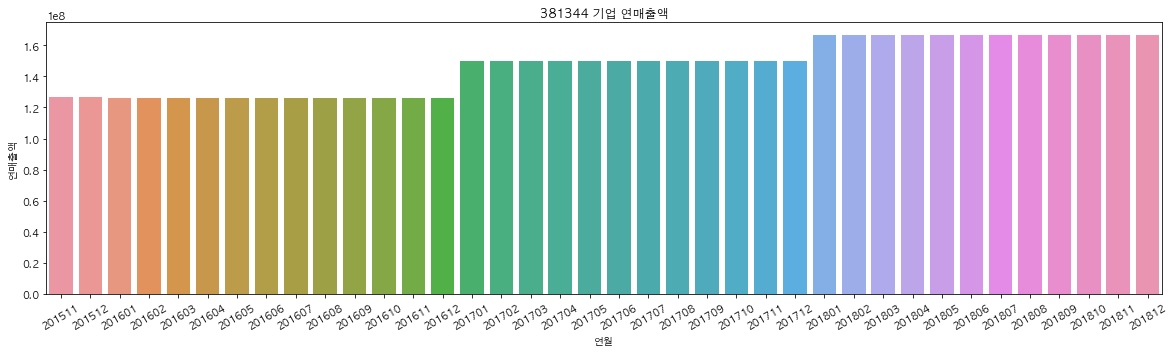

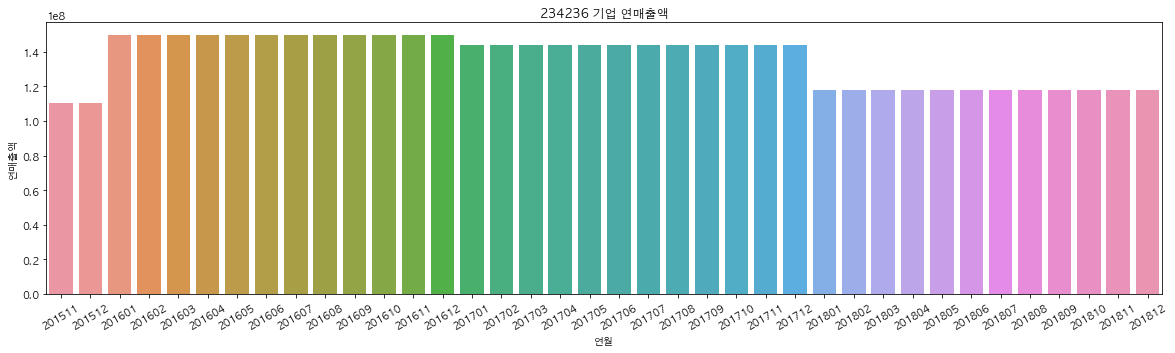

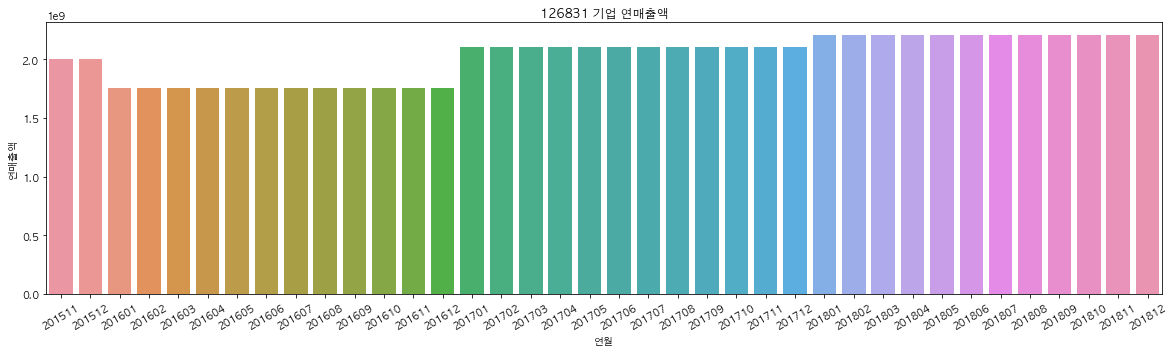

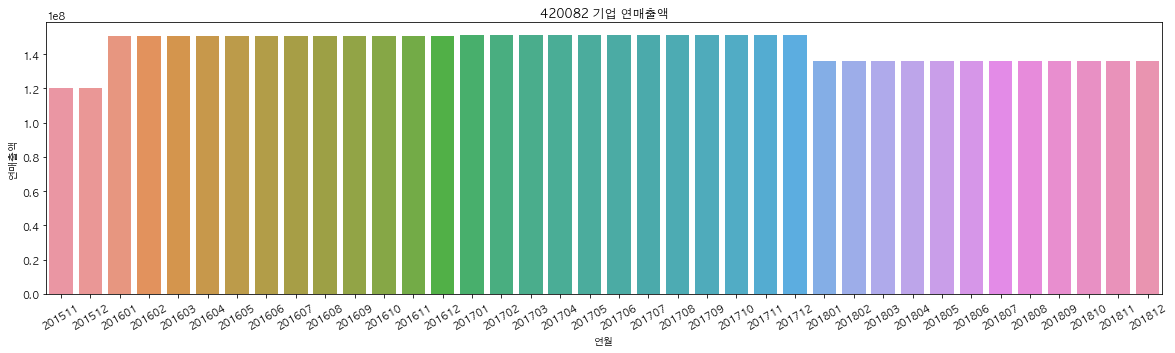

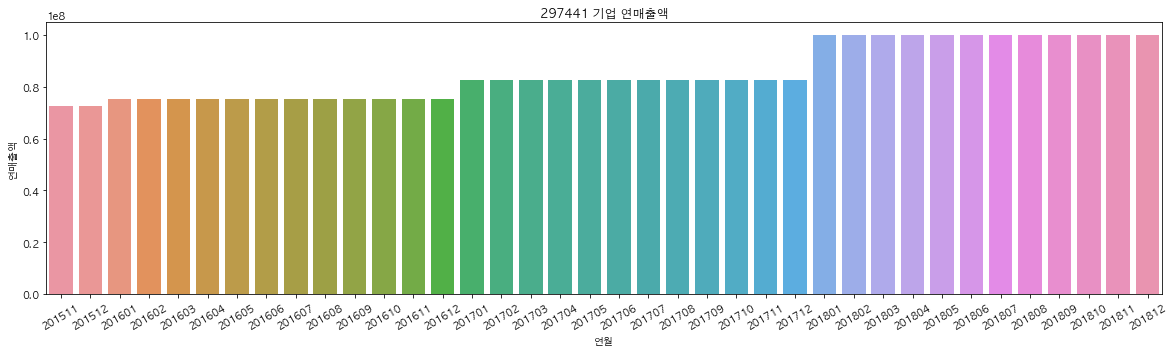

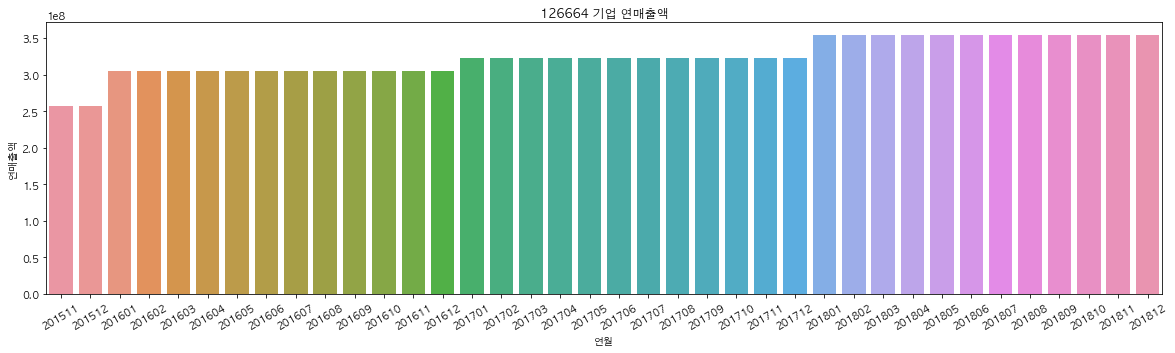

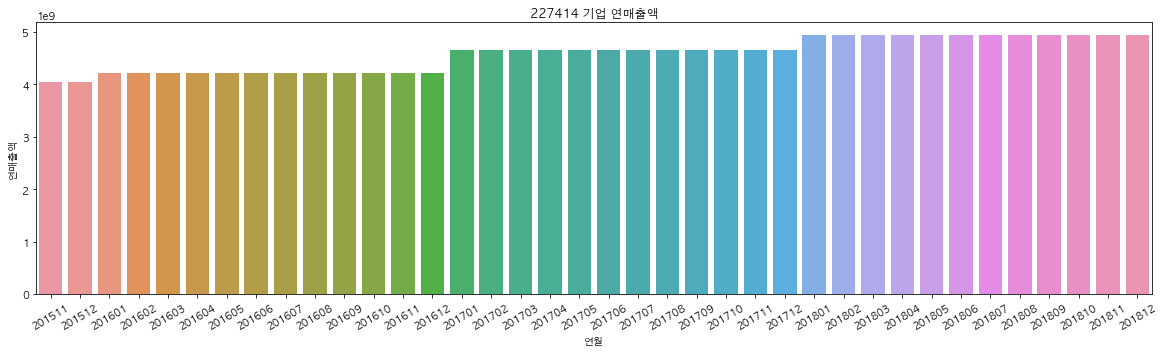

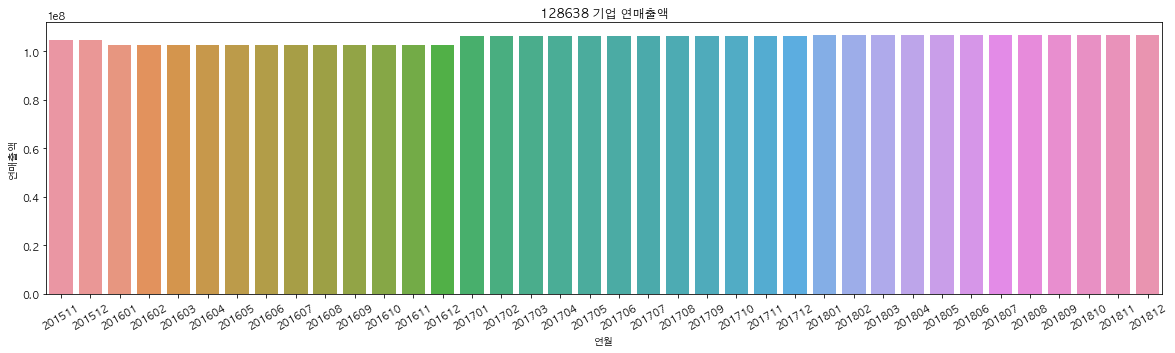

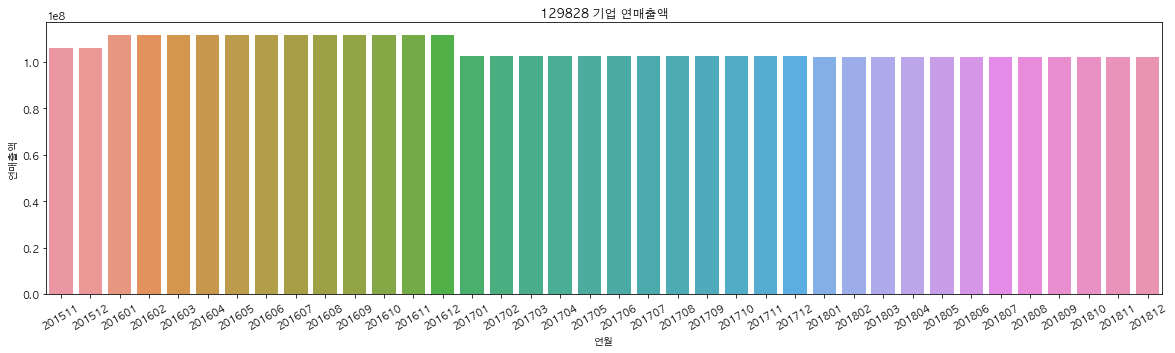

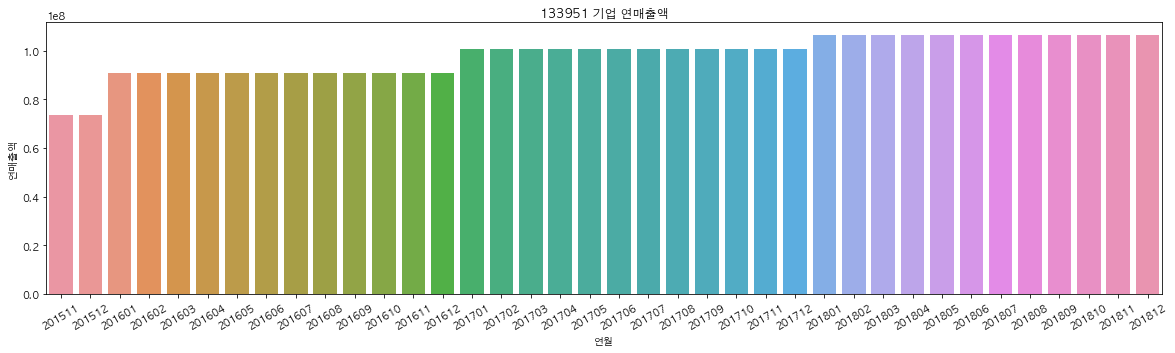

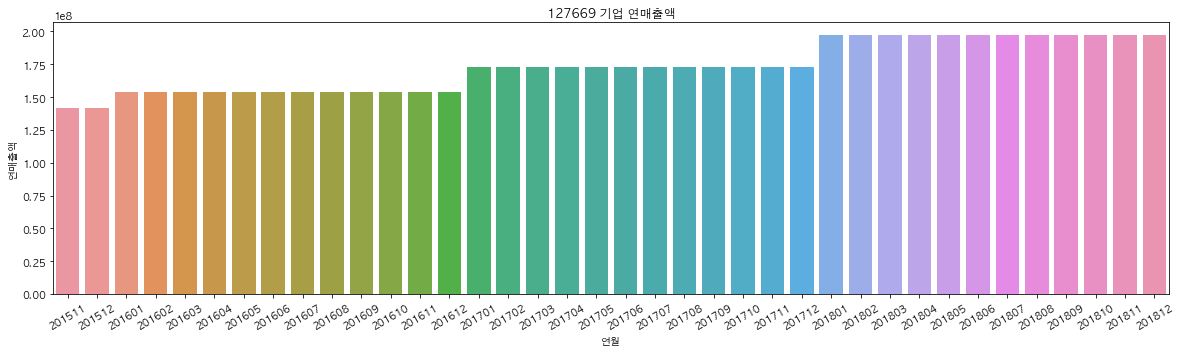

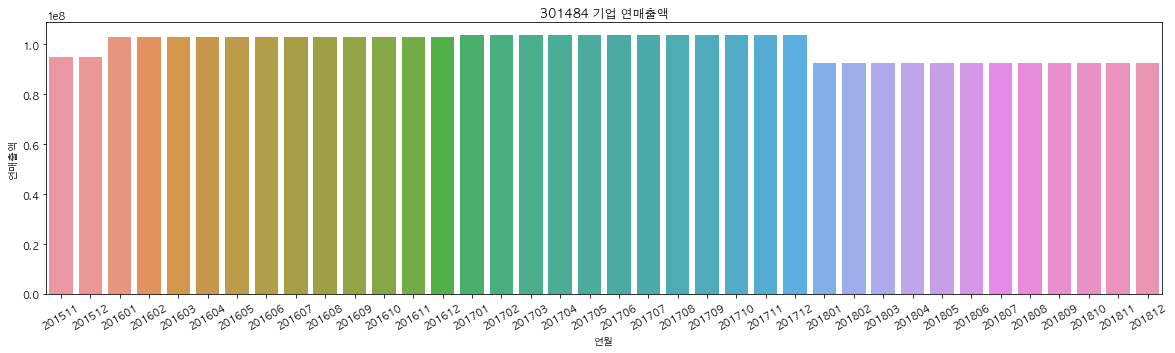

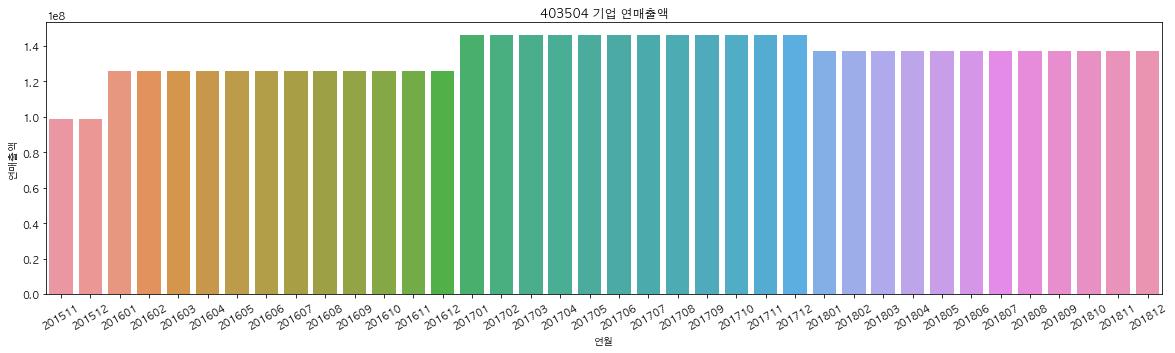

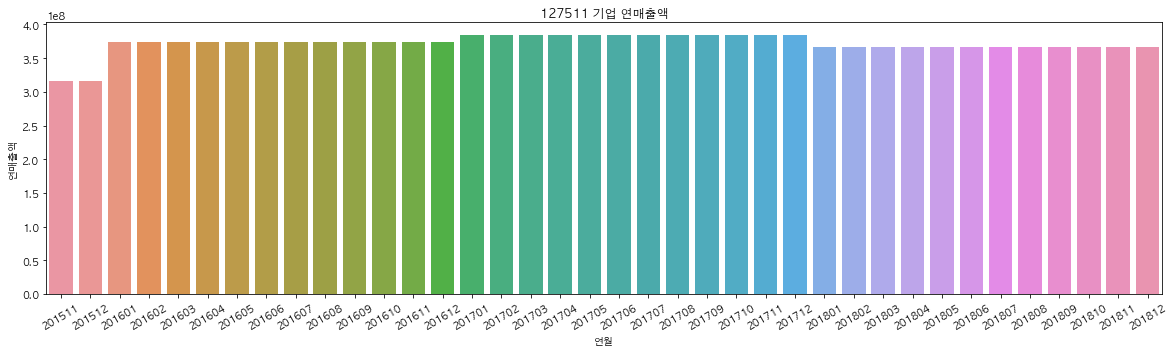

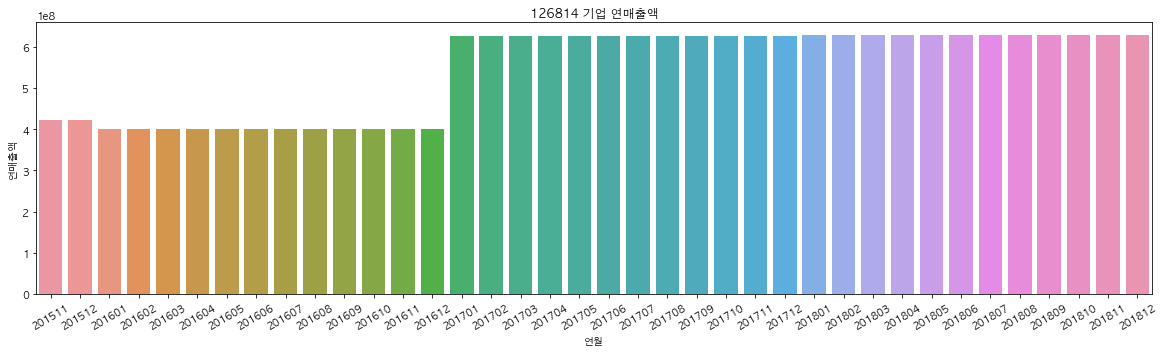

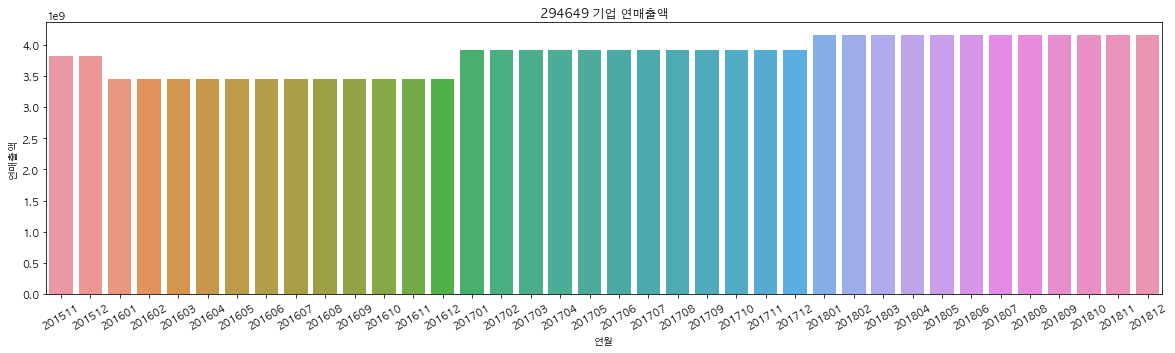

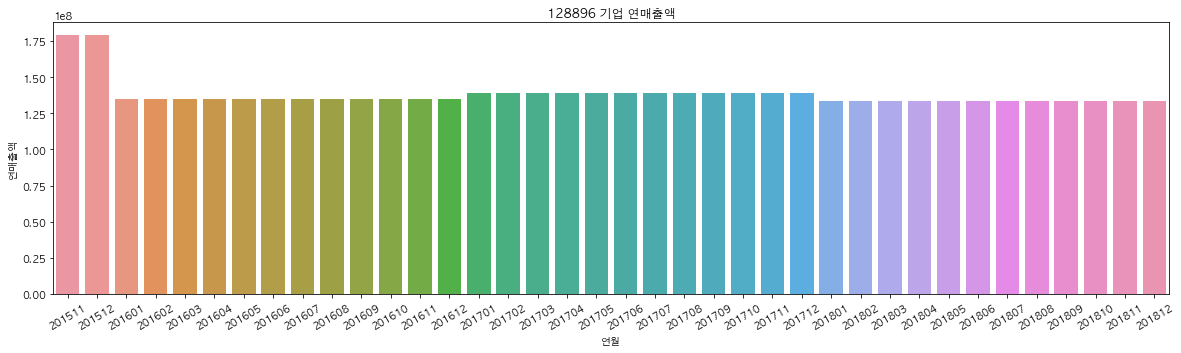

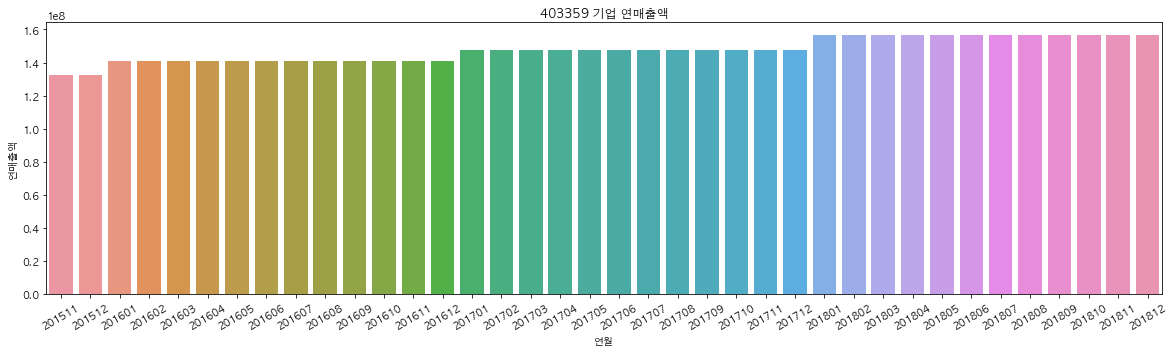

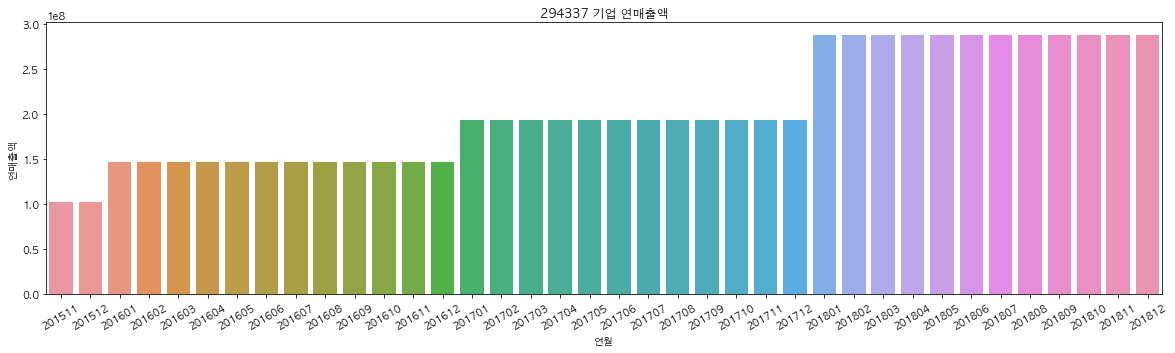

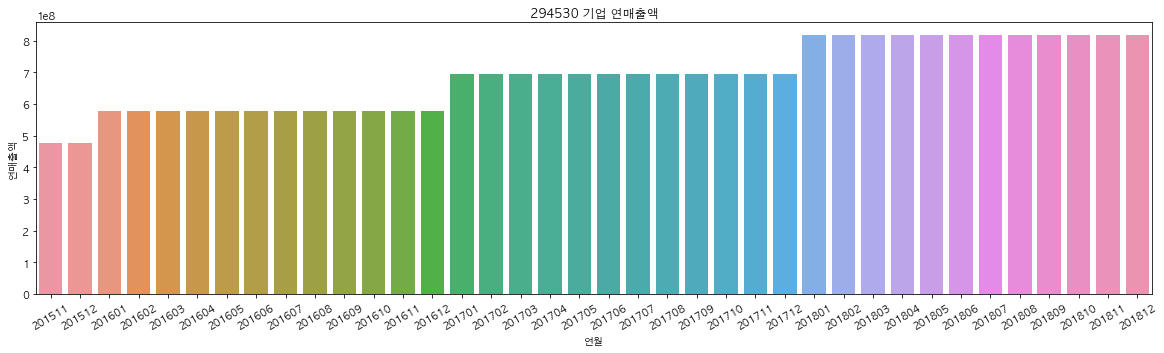

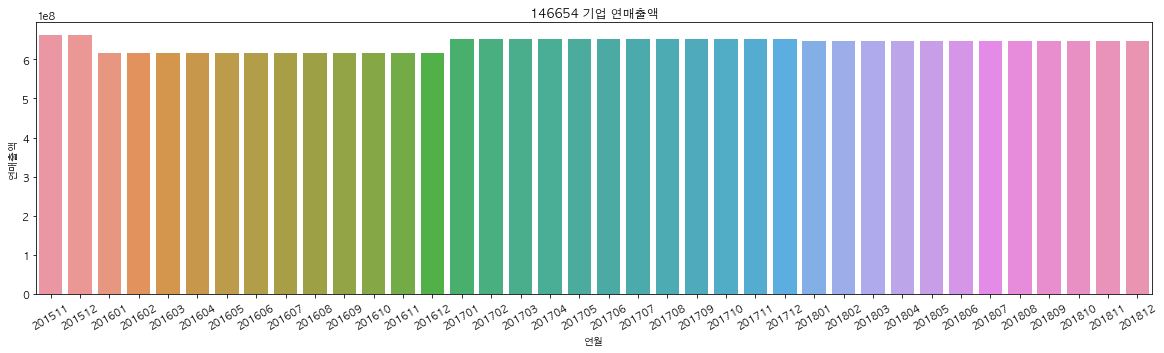

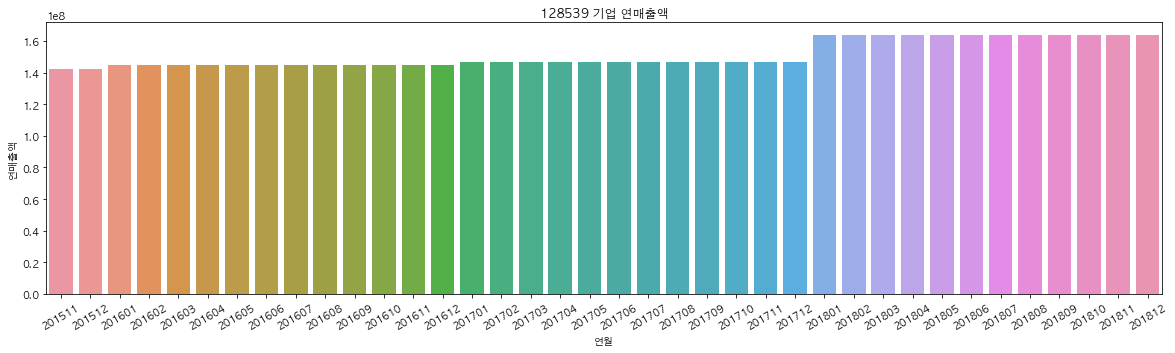

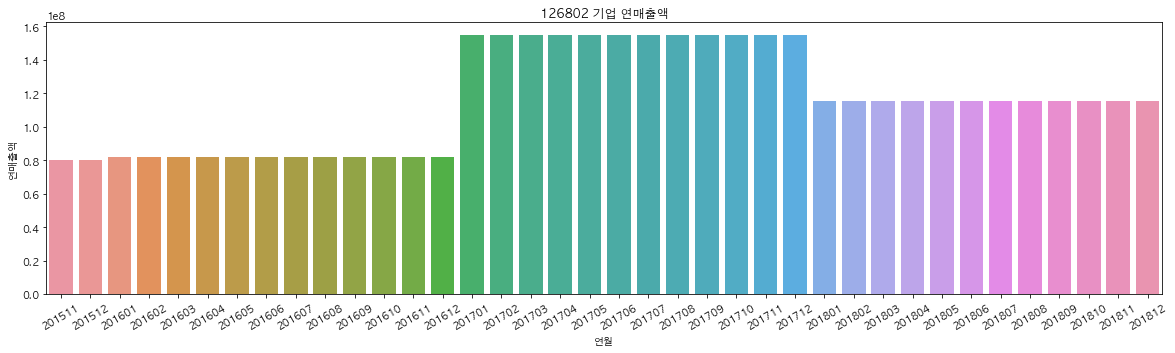

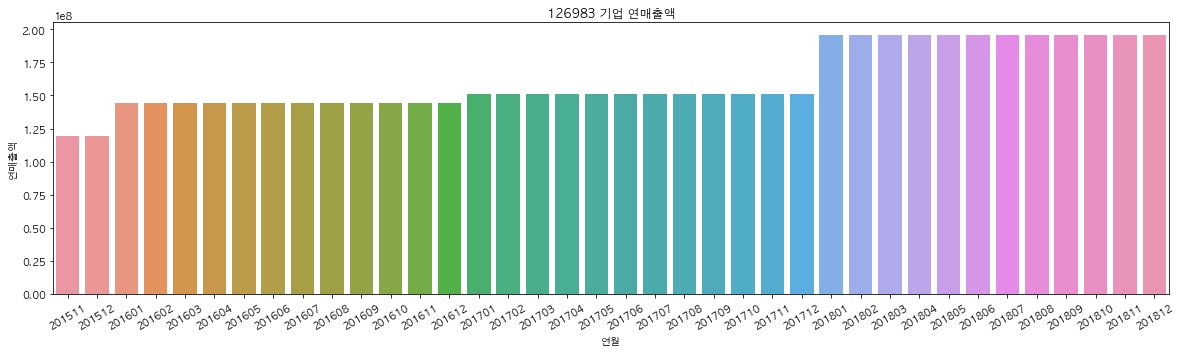

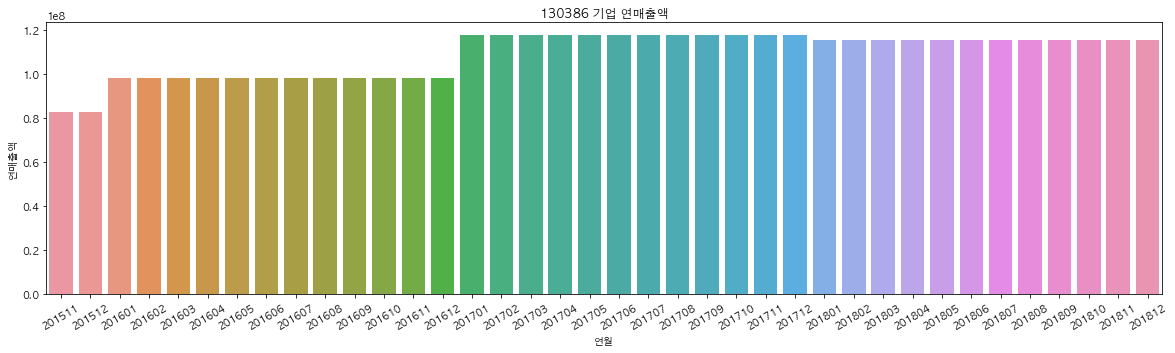

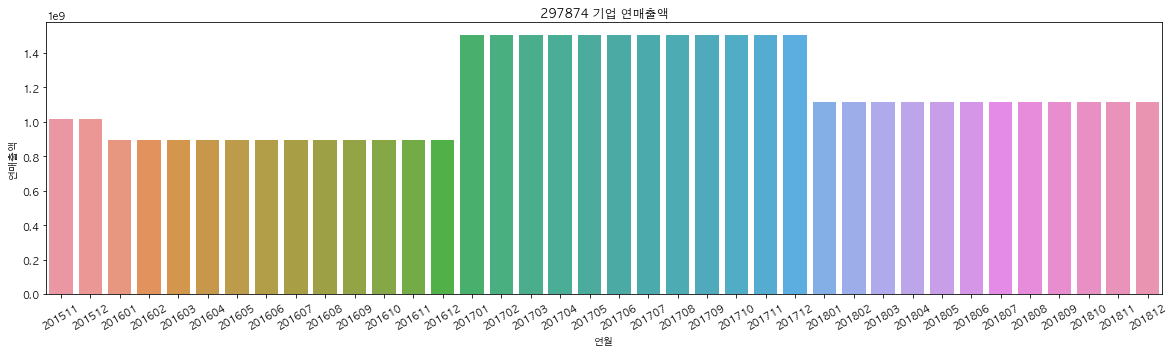

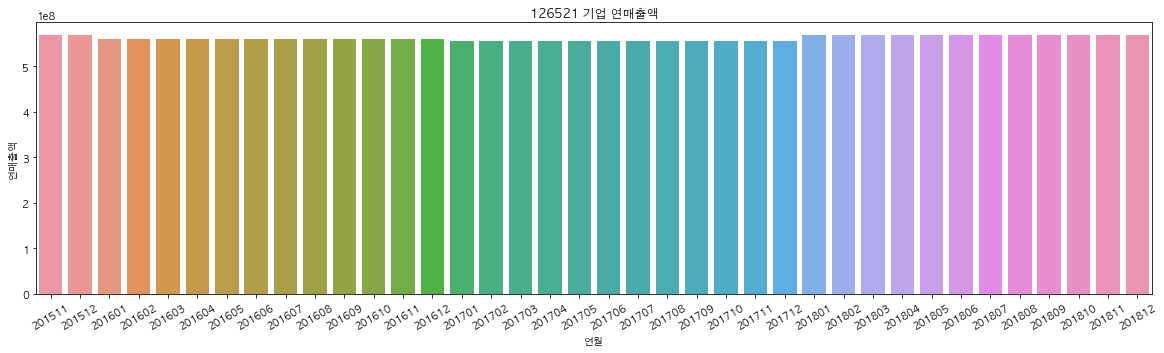

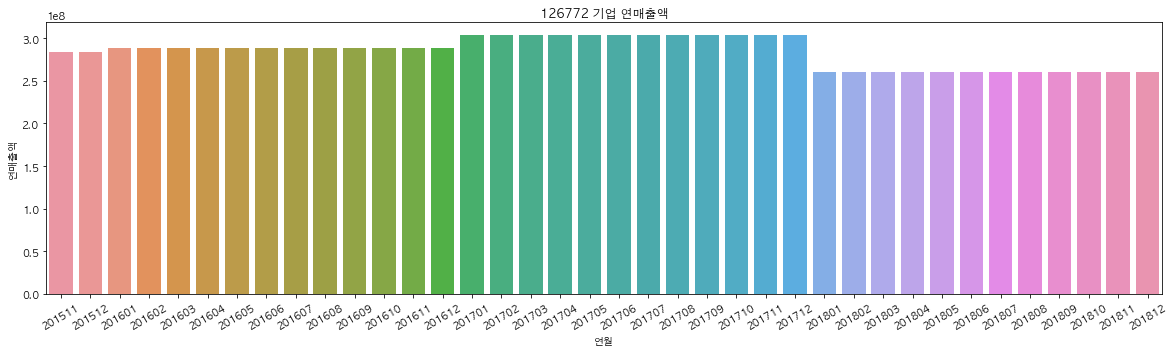

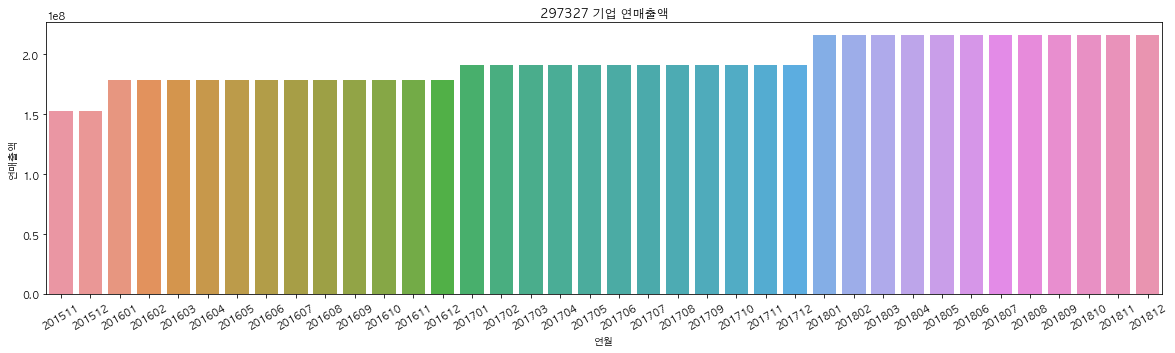

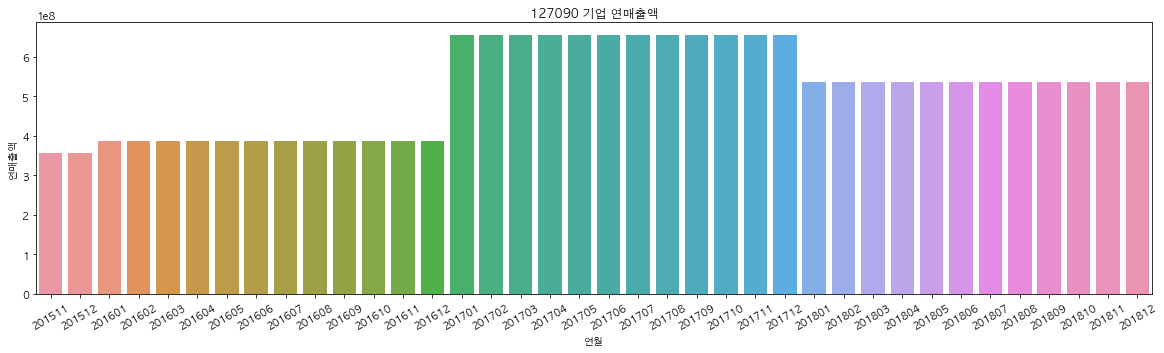

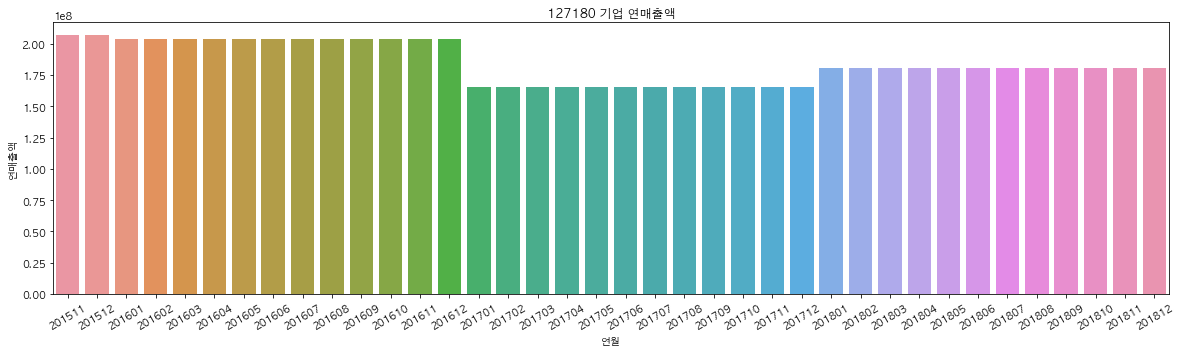

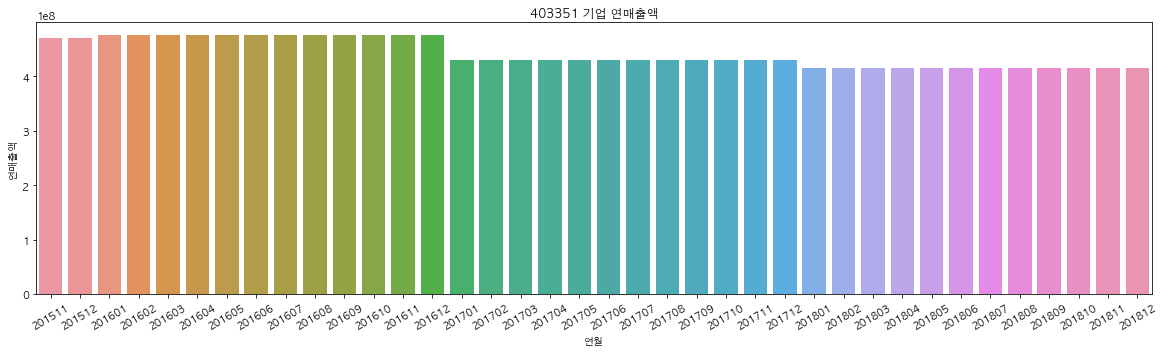

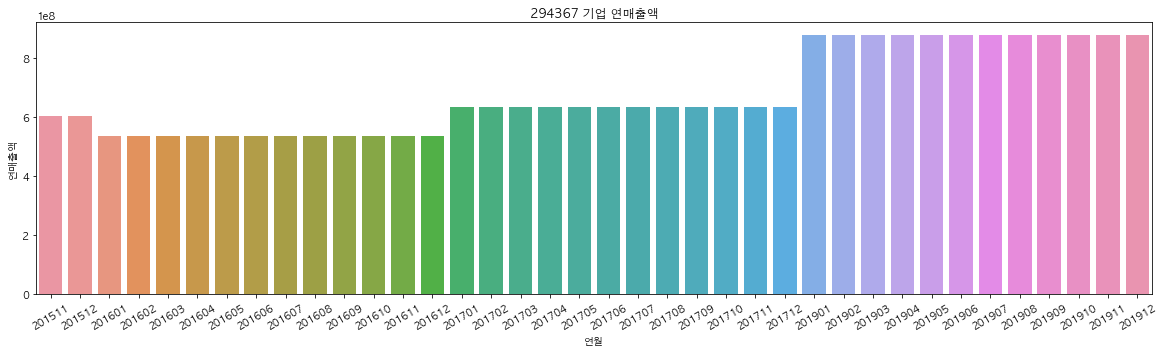

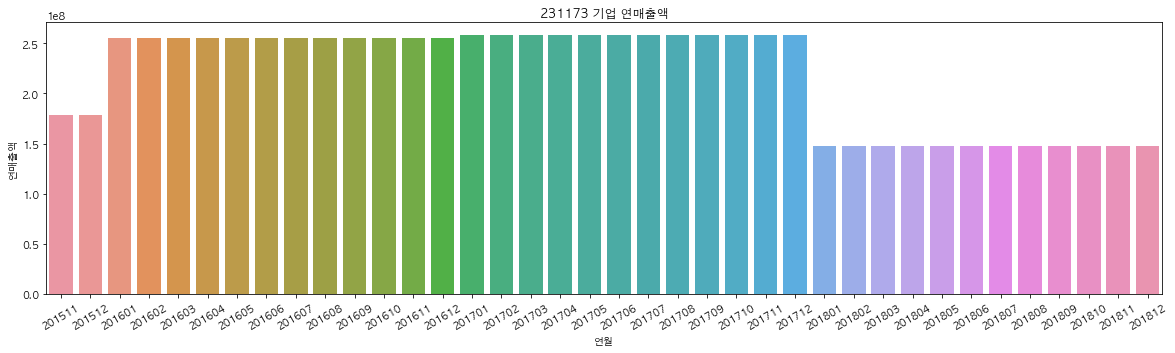

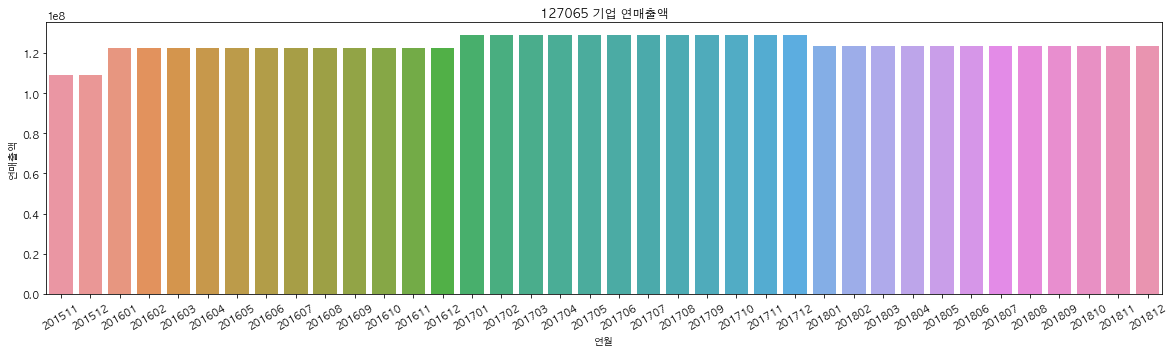

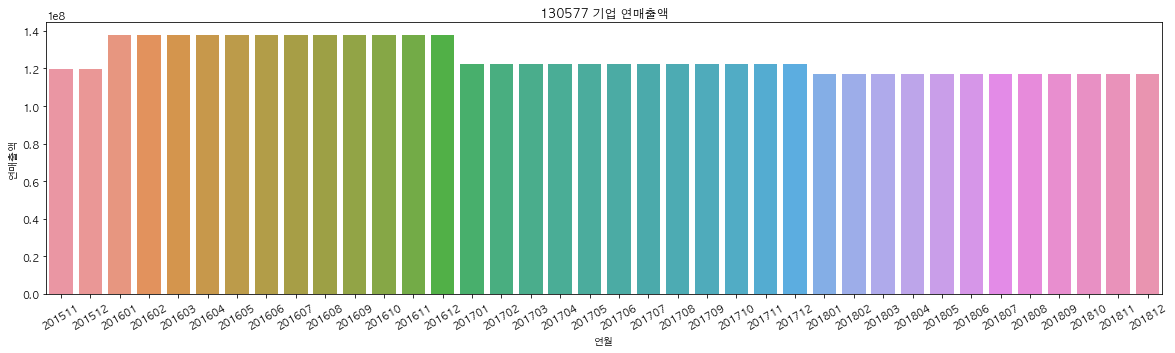

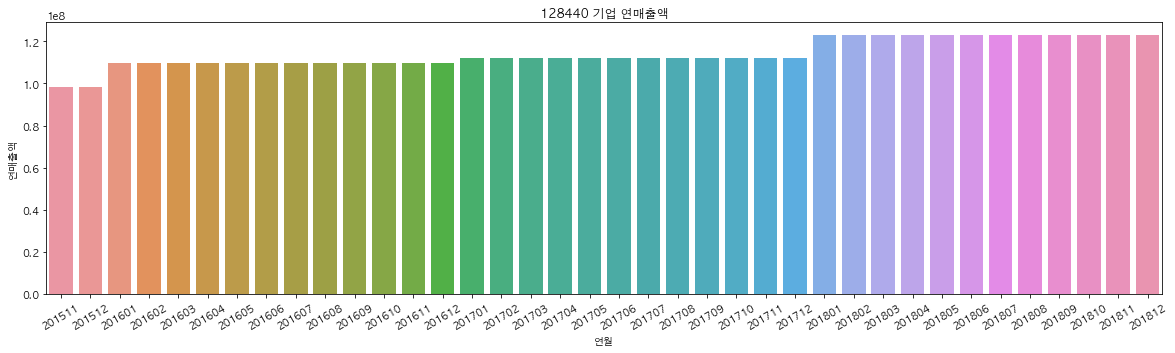

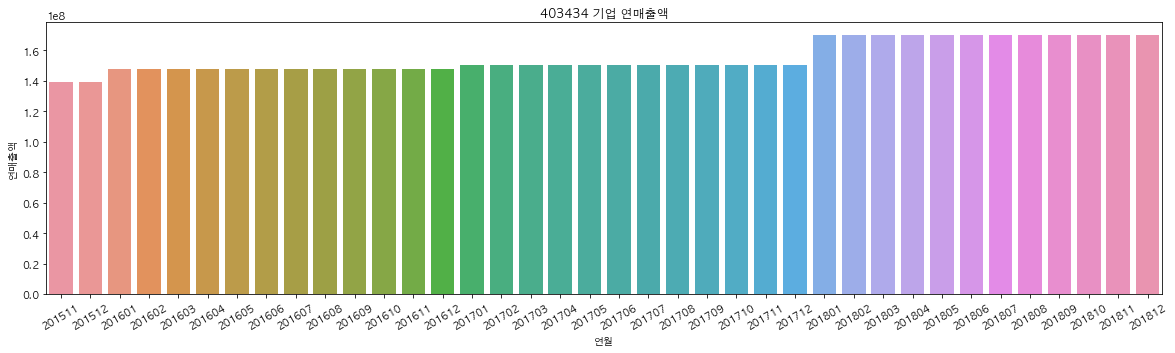

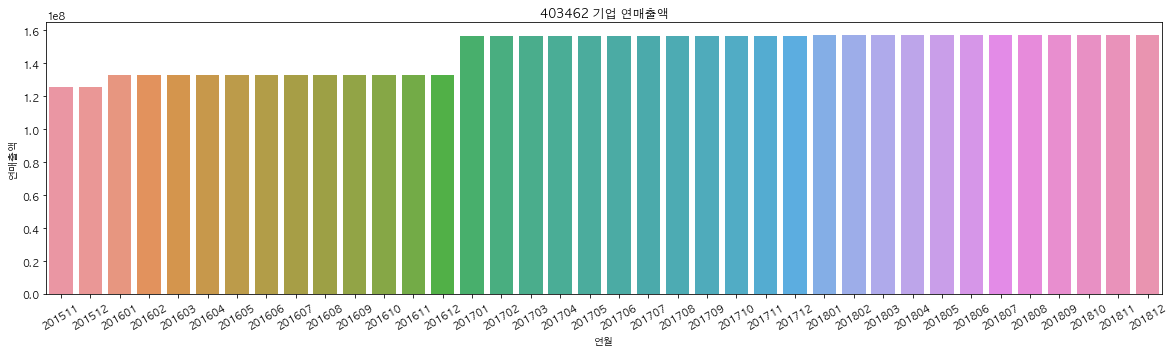

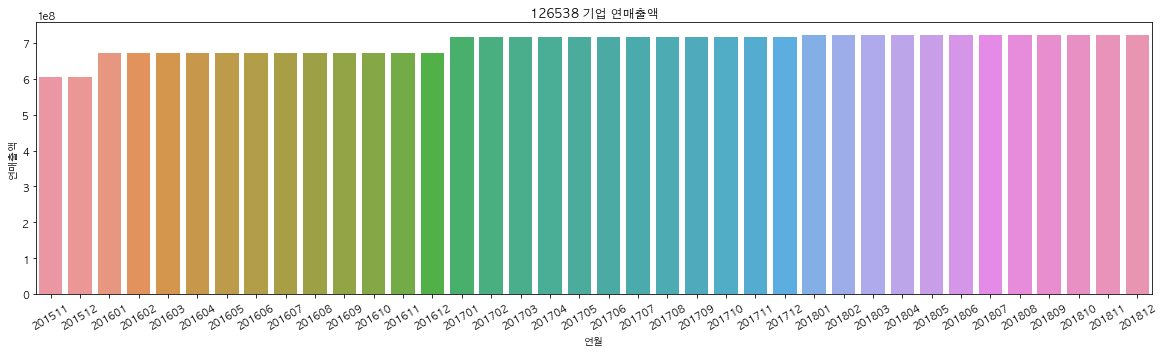

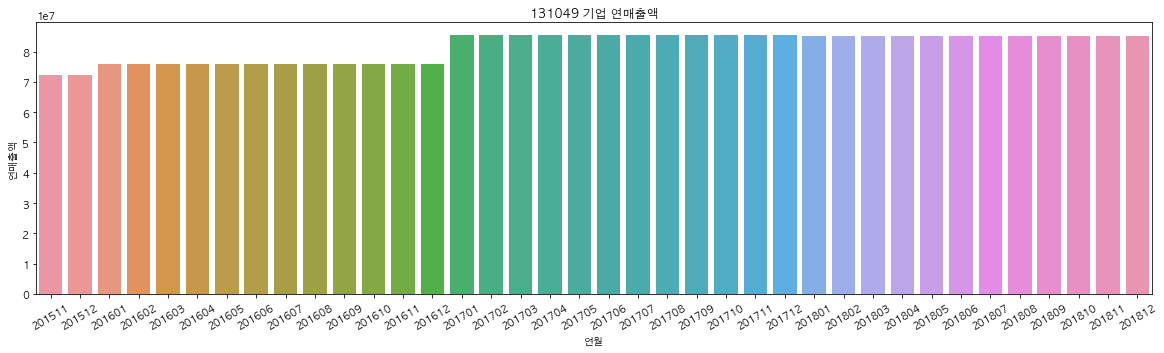

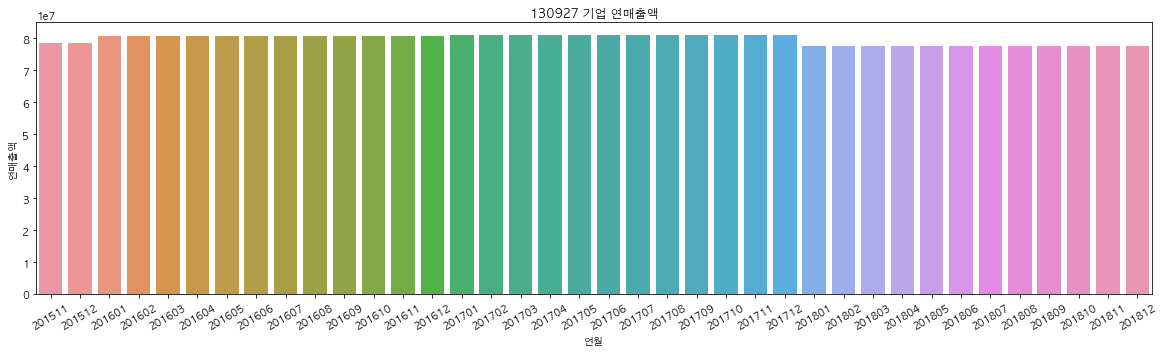

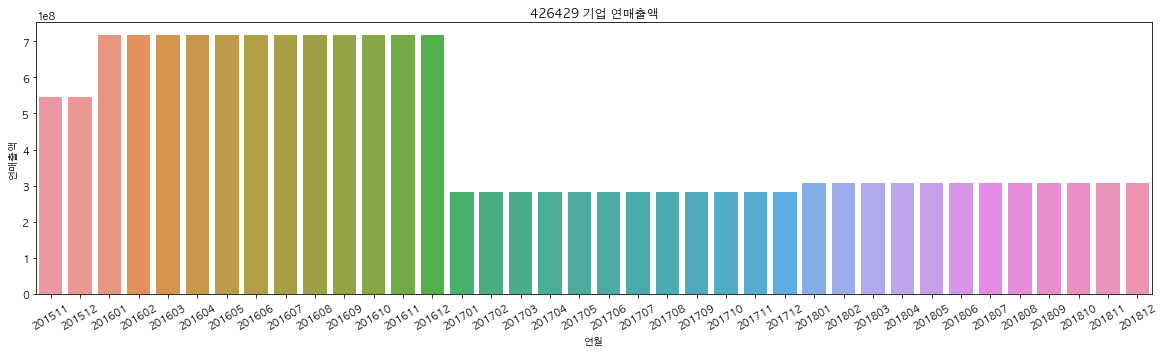

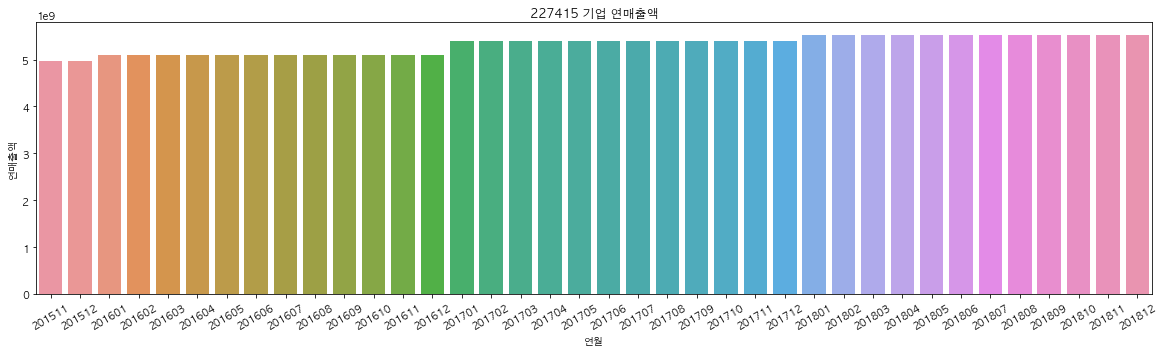

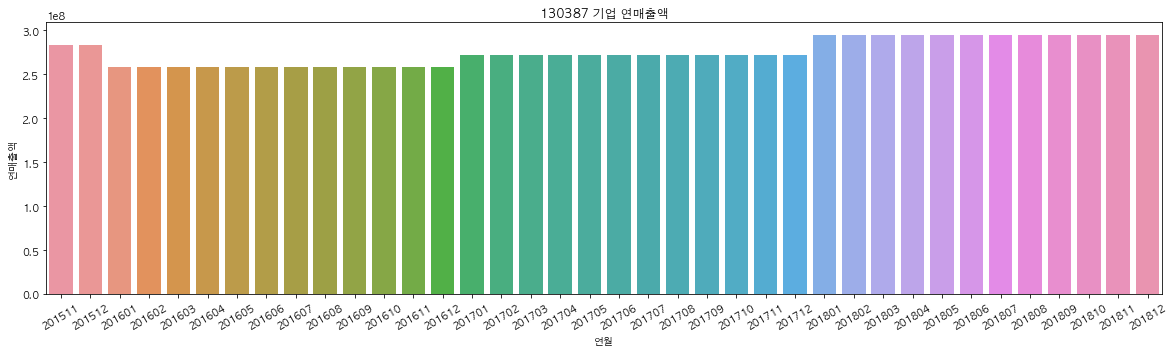

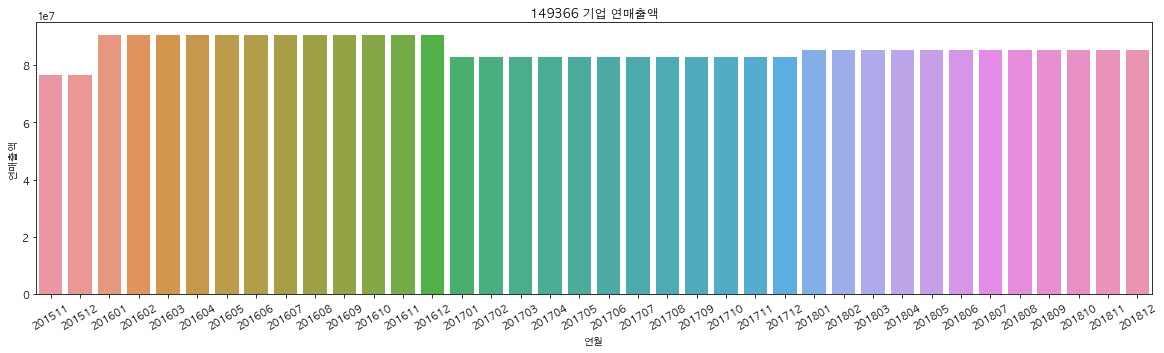

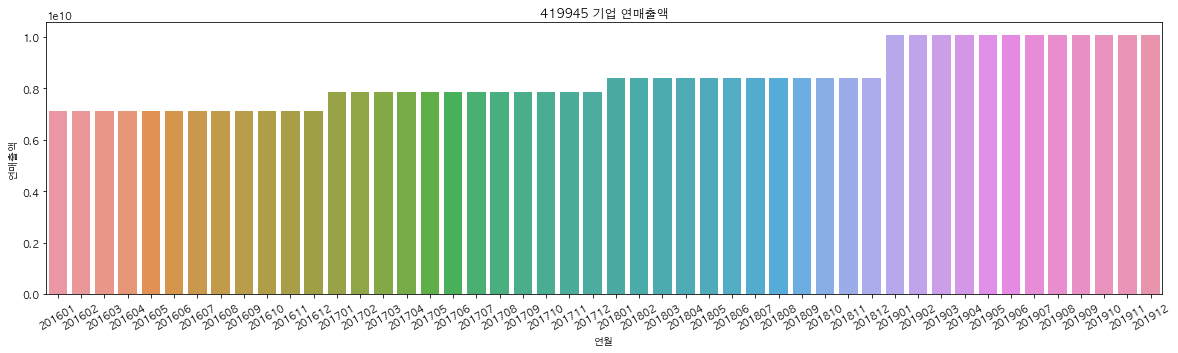

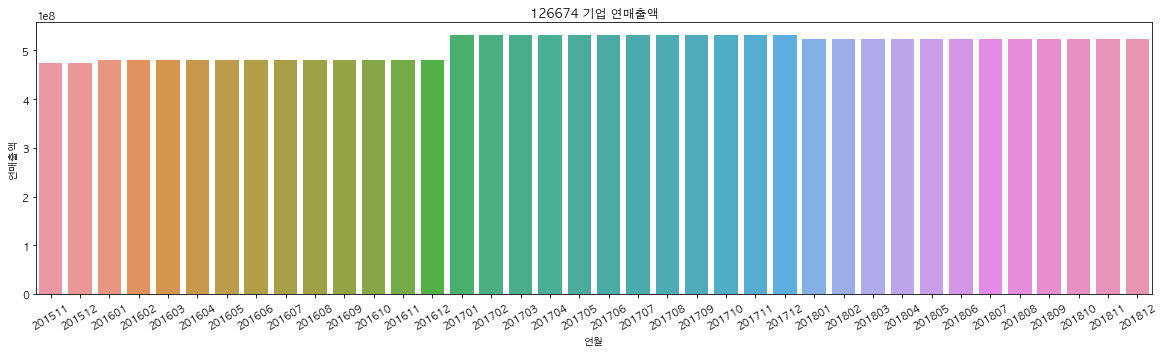

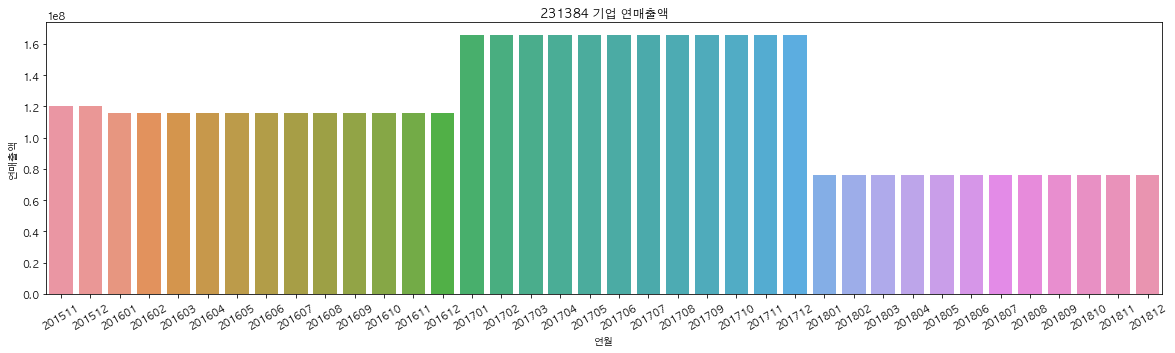

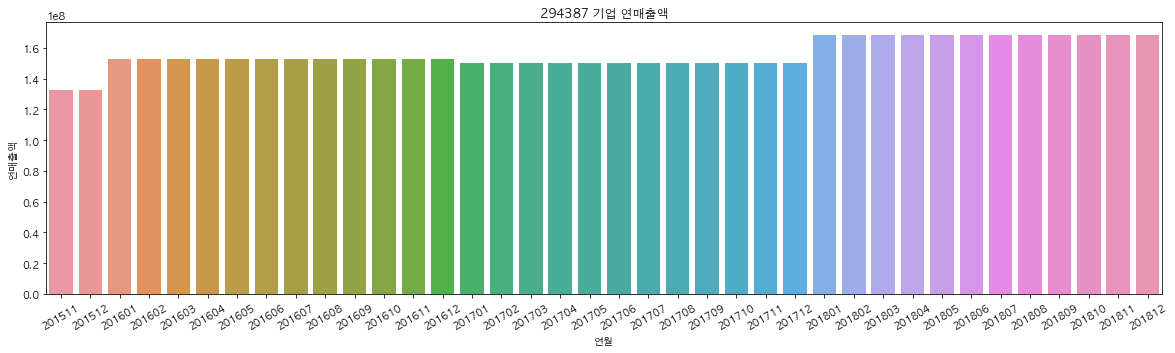

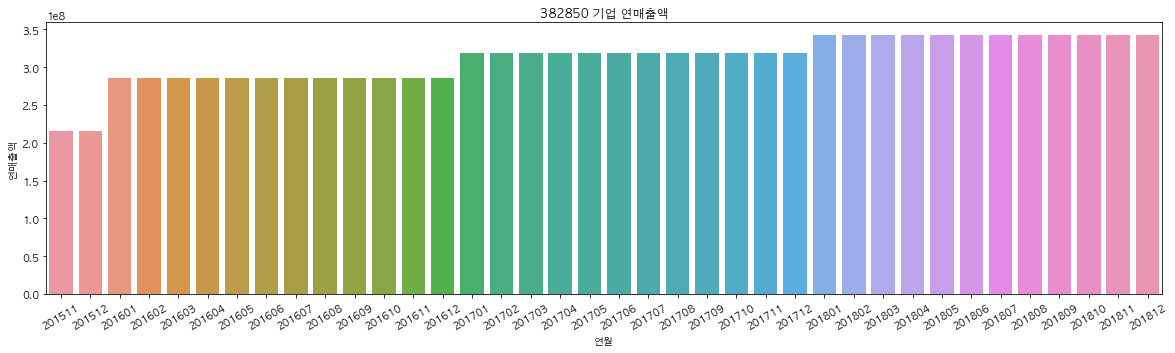

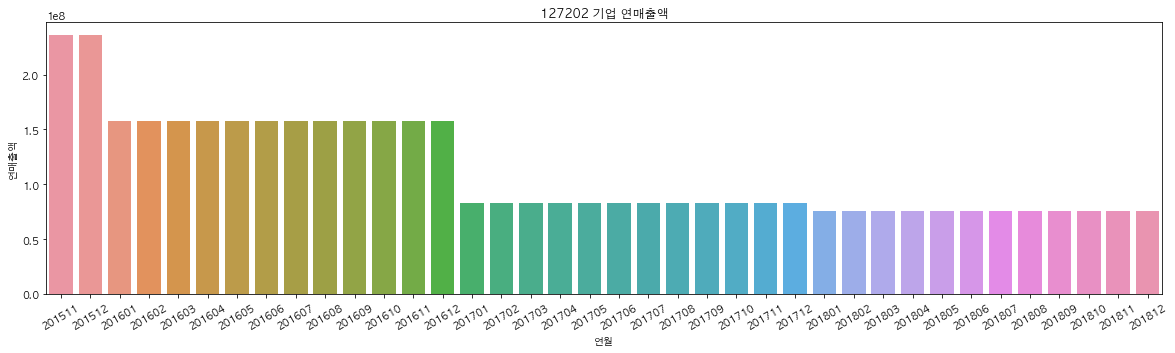

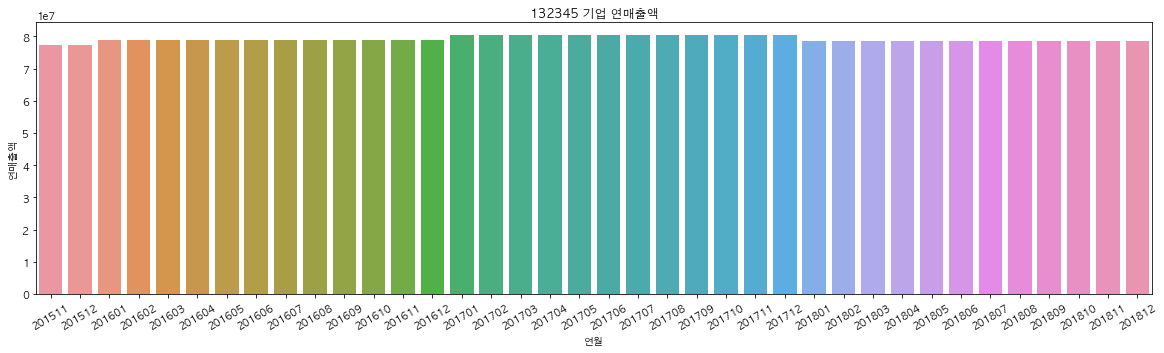

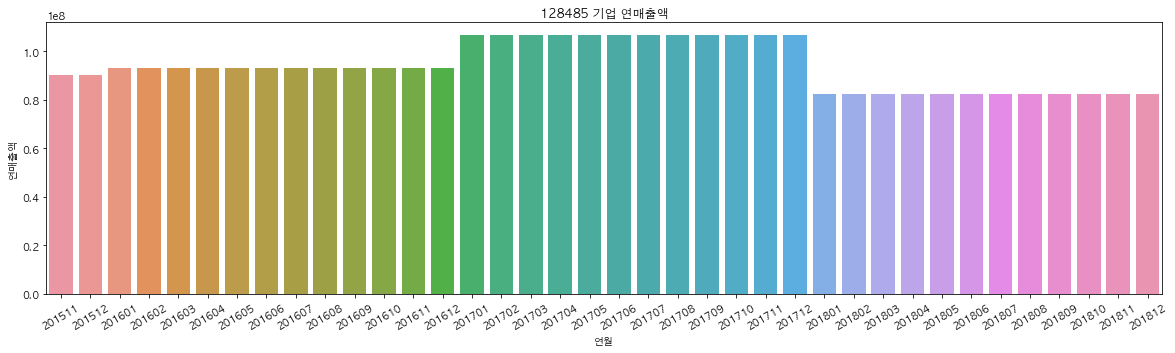

In [114]:
for i in range(63):    
    com_4 = data.loc[data['회사ID']==four_years[i]]

    plt.figure(figsize=(20,5))
    sns.barplot(x=com_4['연월'], y=com_4['연매출액'])
    plt.title('{} 기업 연매출액'.format(four_years[i]))
    plt.ylabel('연매출액')
    plt.xticks(rotation=30)
    plt.show()

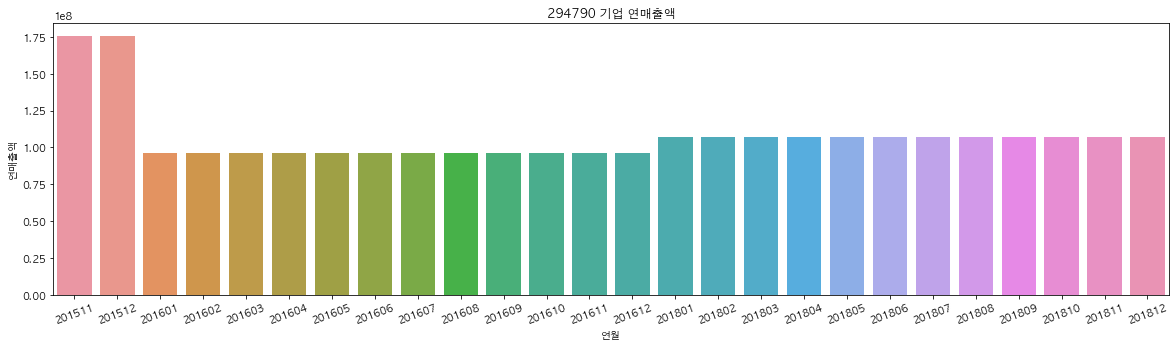

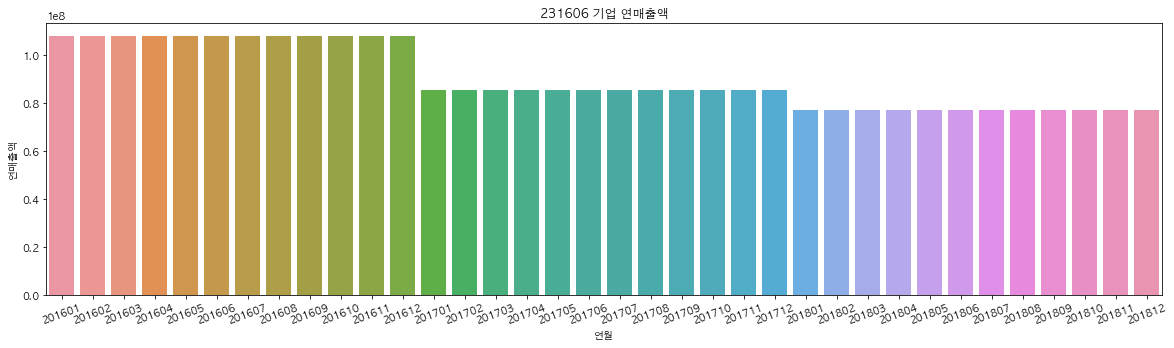

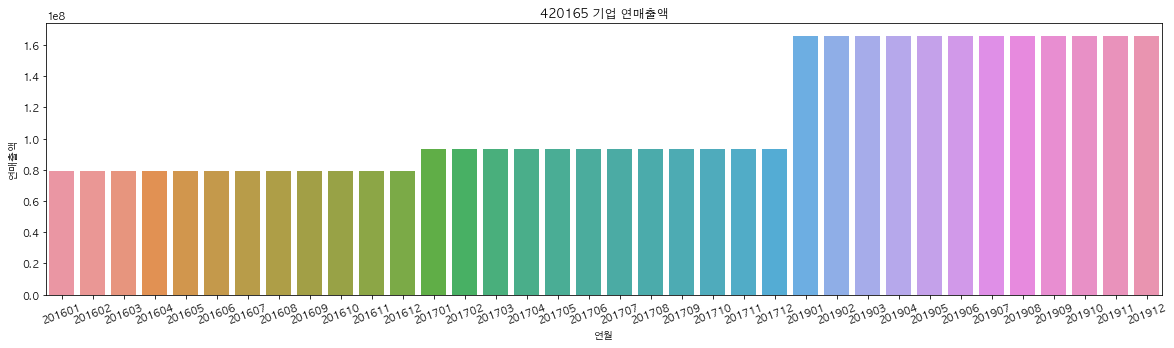

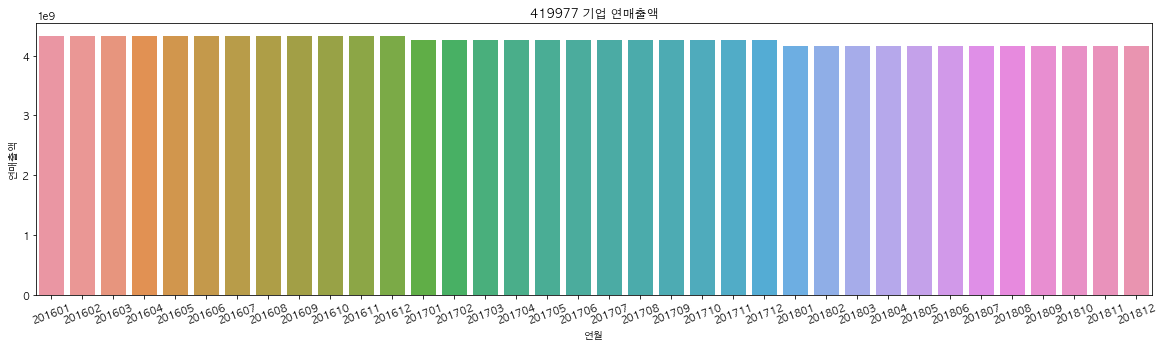

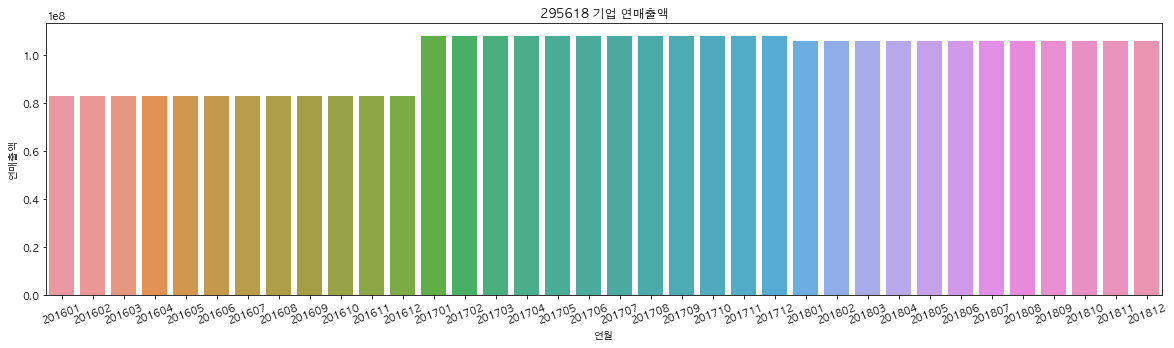

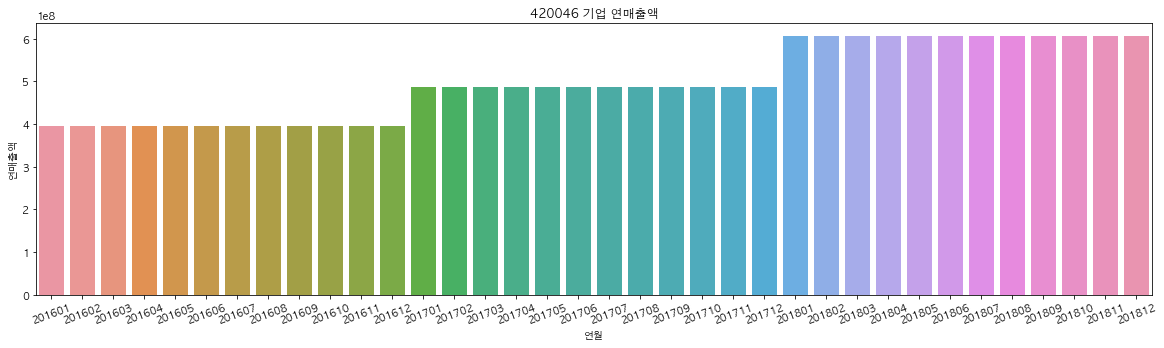

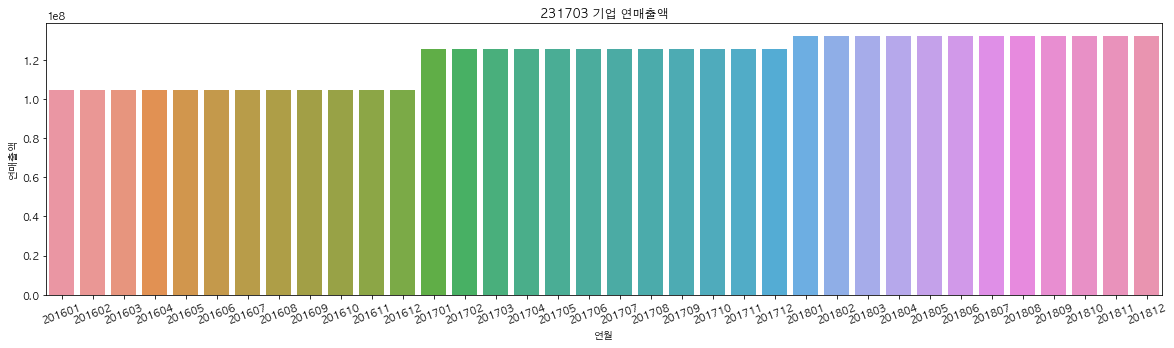

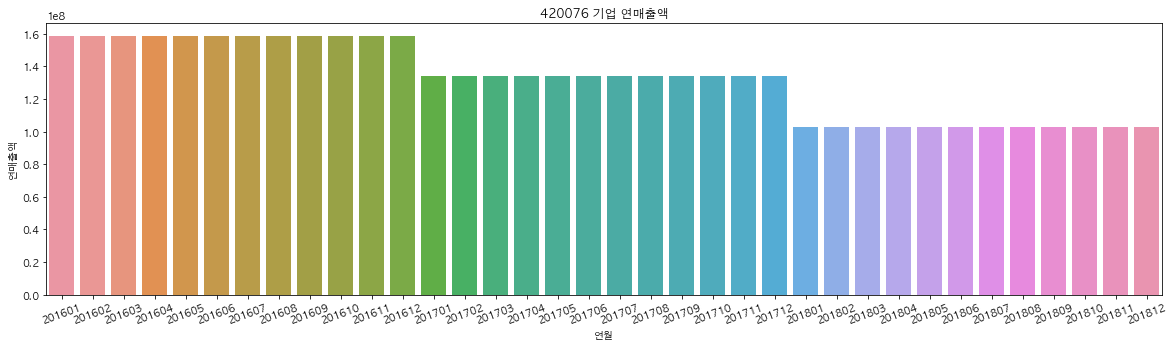

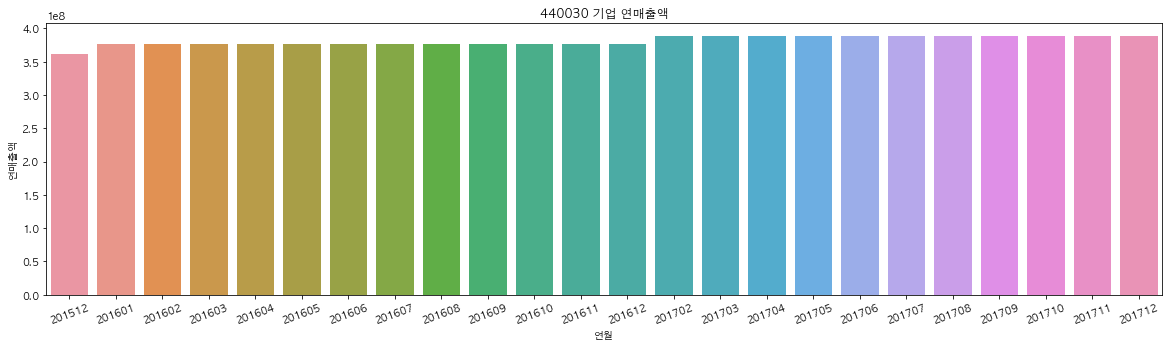

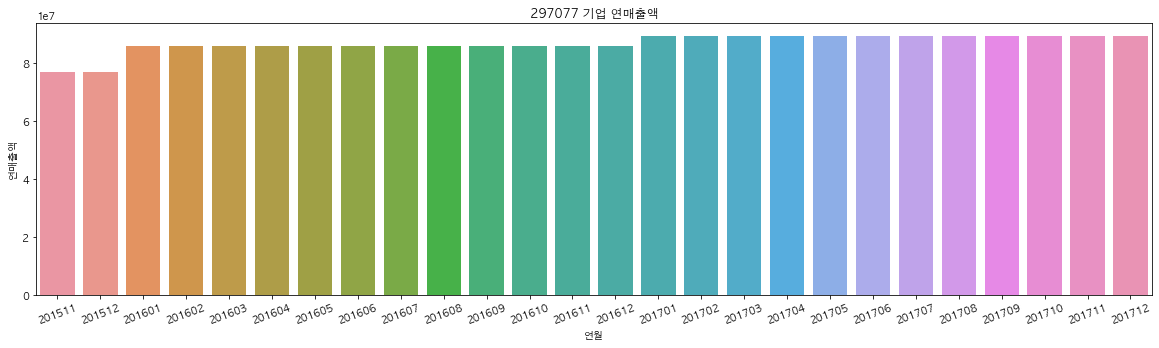

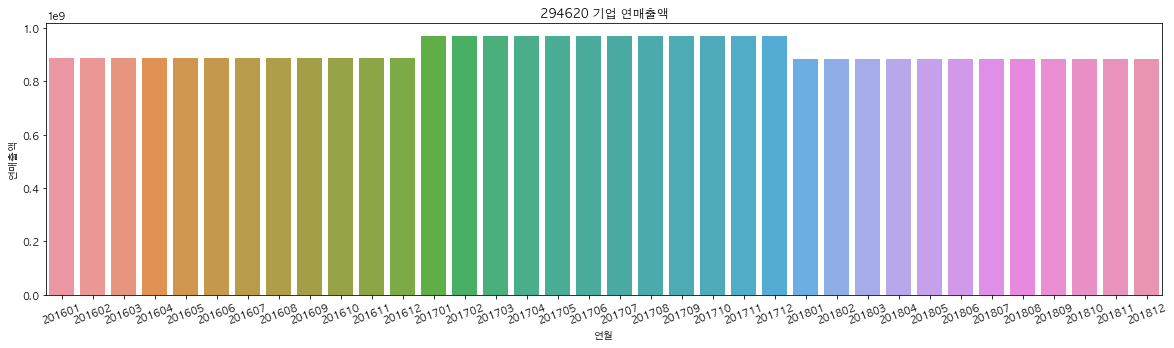

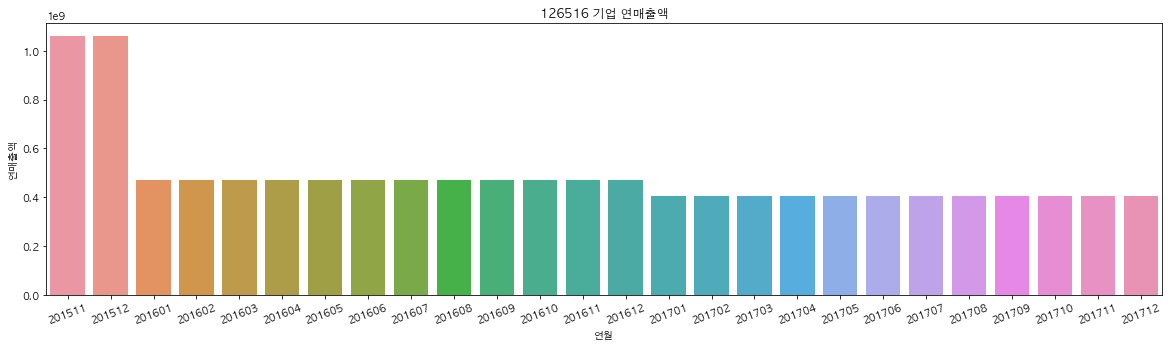

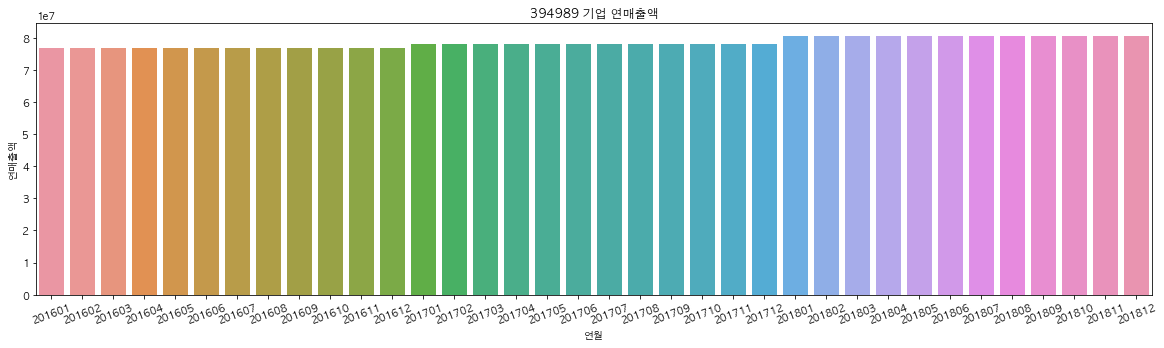

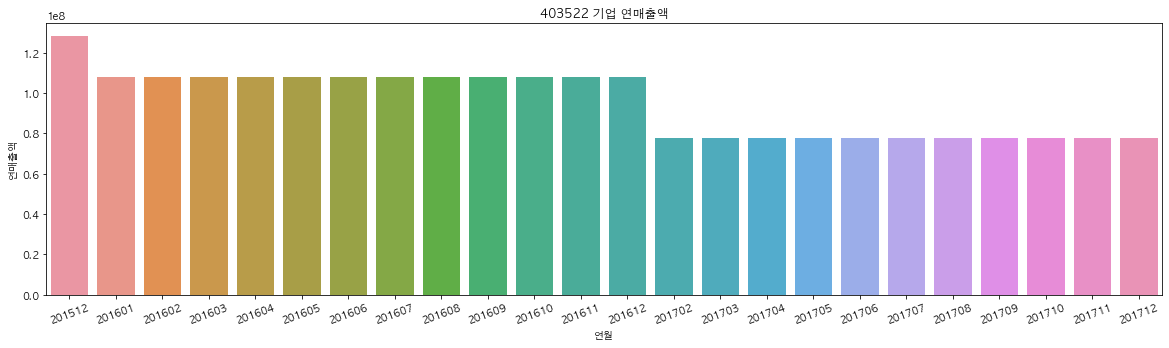

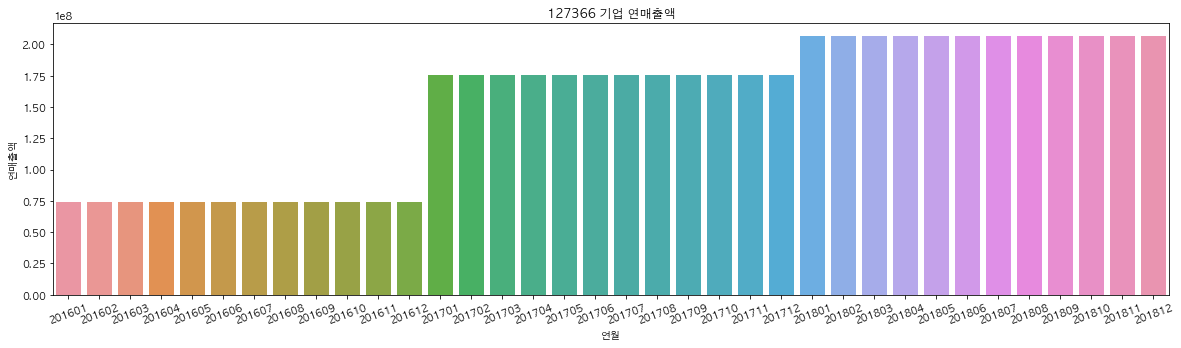

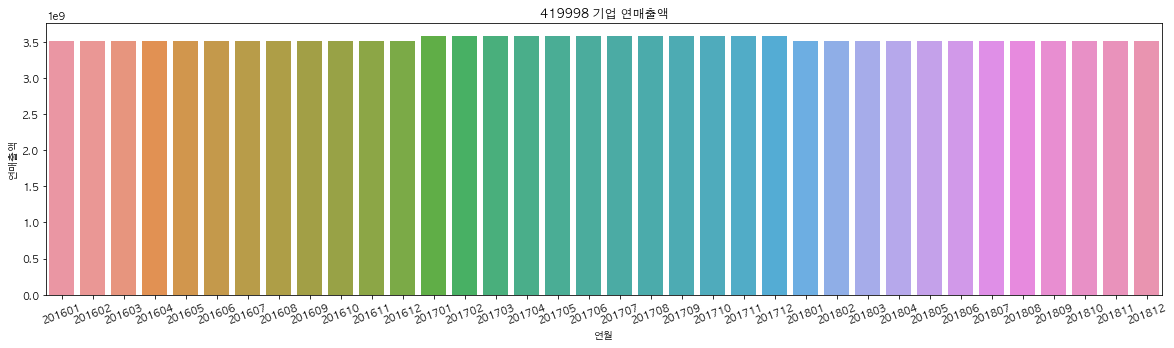

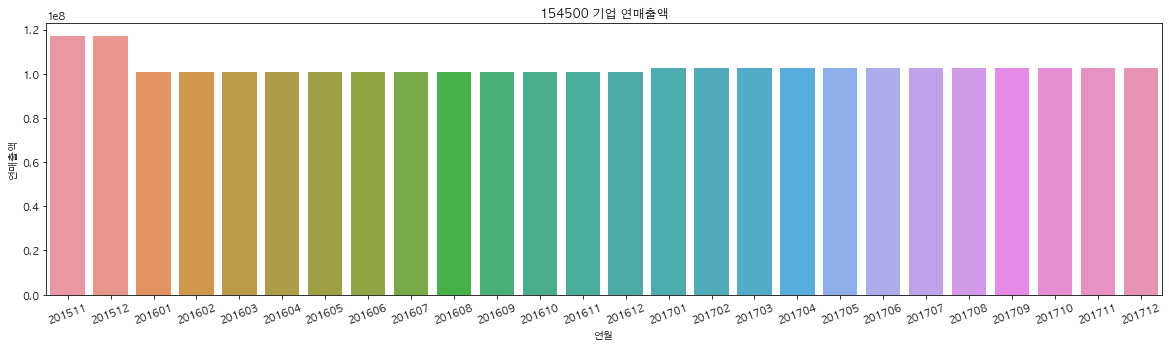

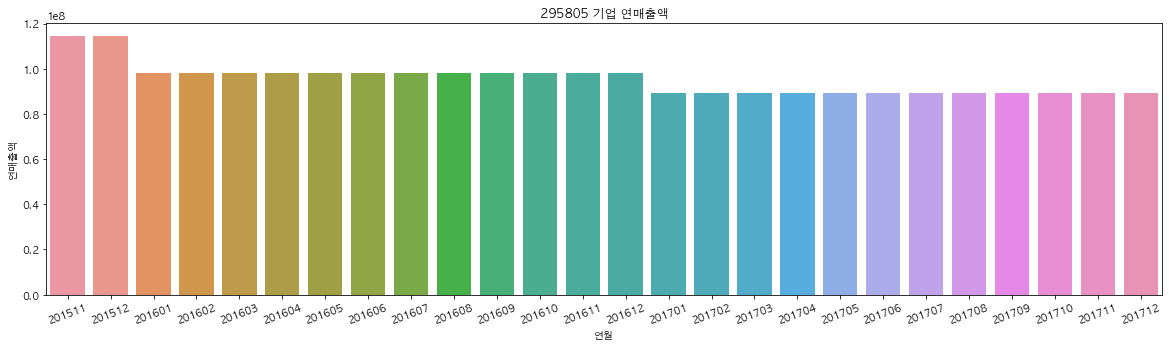

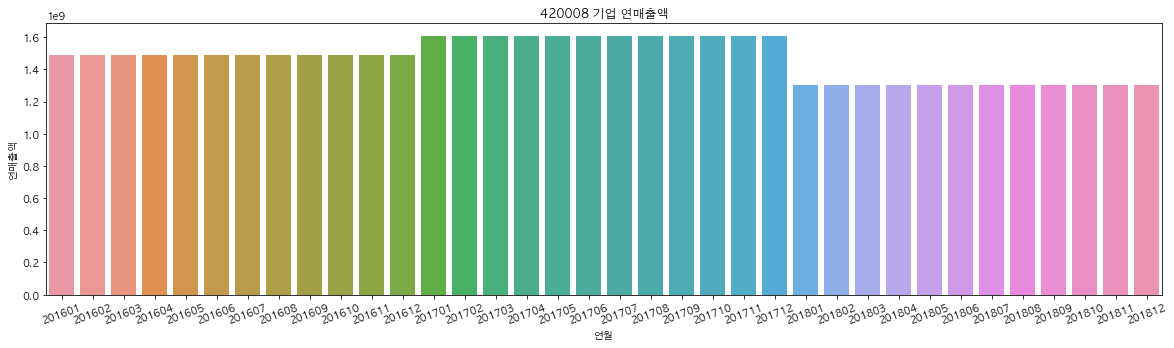

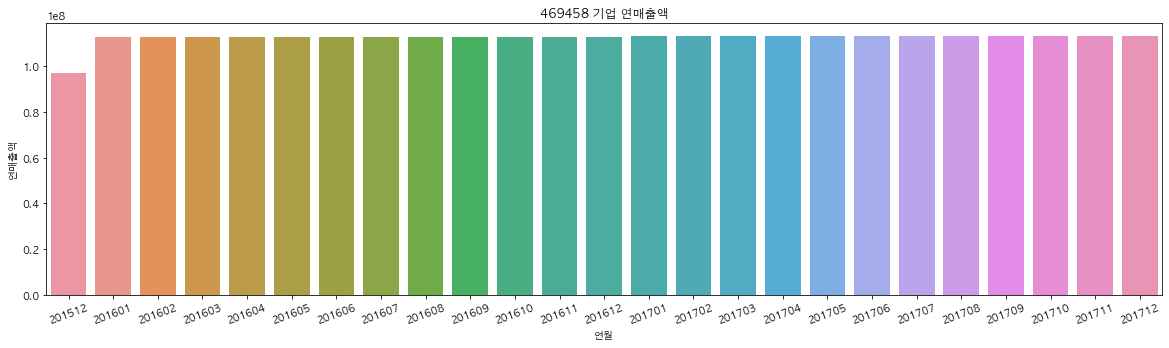

In [109]:
for i in range(20):    
    com_3 = data.loc[data['회사ID']==three_years[i]]

    plt.figure(figsize=(20,5))
    sns.barplot(x=com_3['연월'], y=com_3['연매출액'])
    plt.title('{} 기업 연매출액'.format(three_years[i]))
    plt.ylabel('연매출액')
    plt.xticks(rotation=30)
    plt.show()

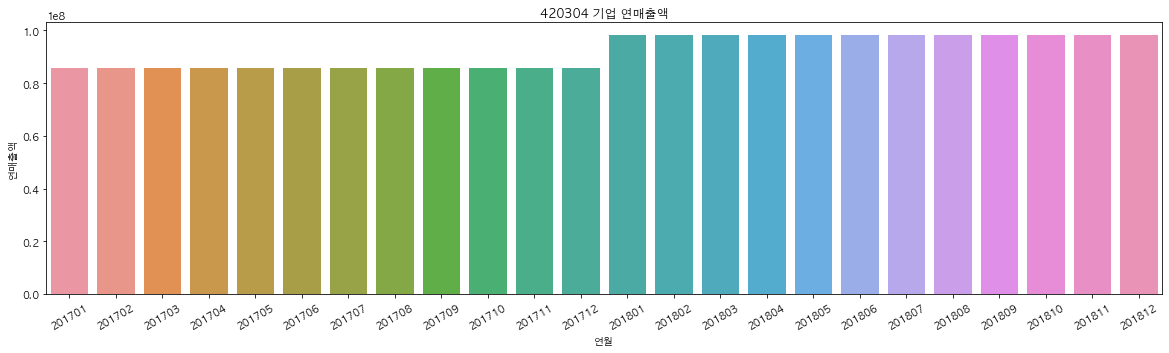

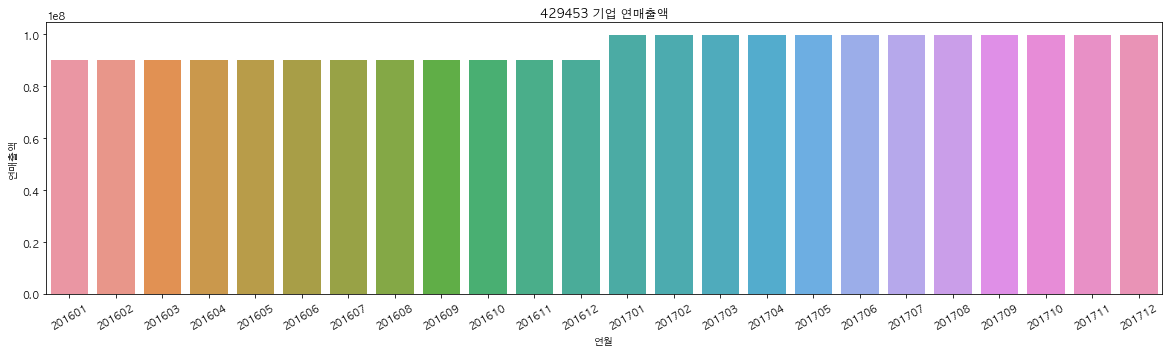

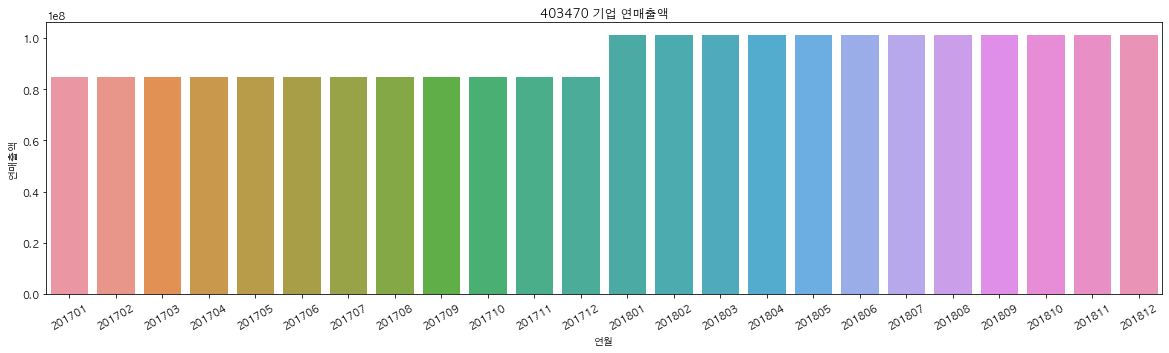

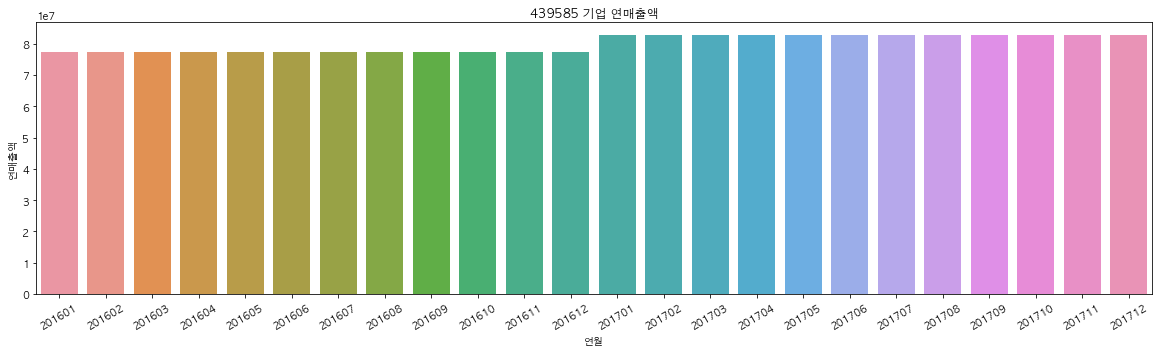

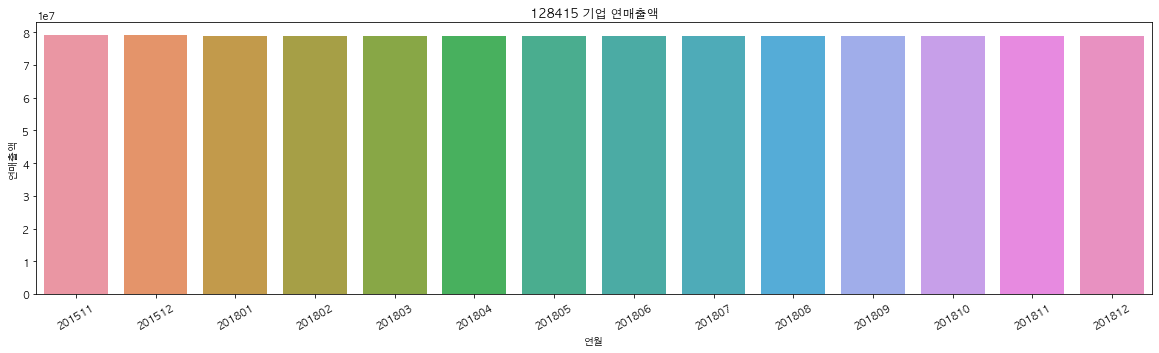

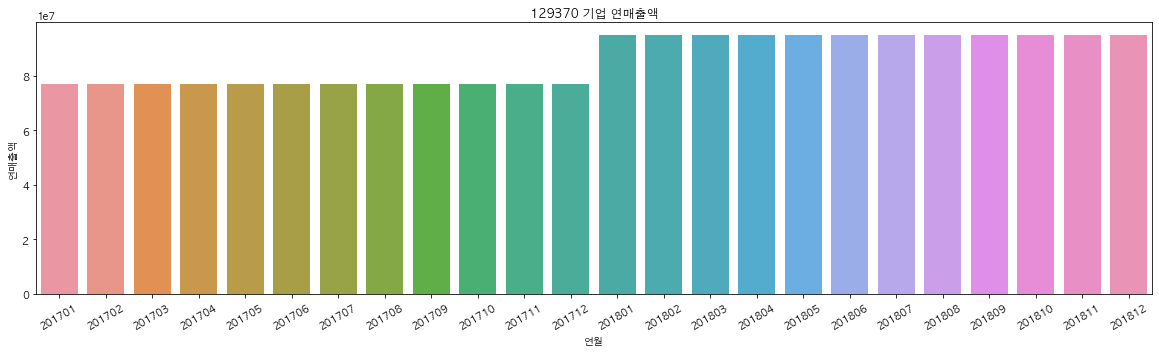

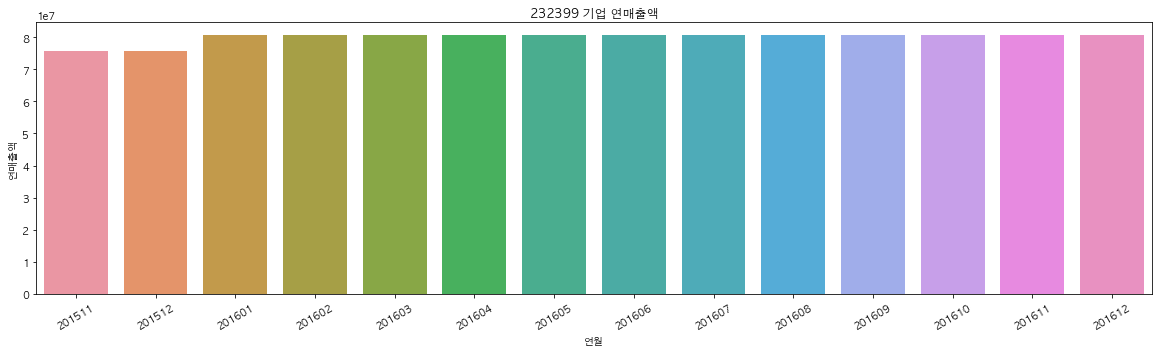

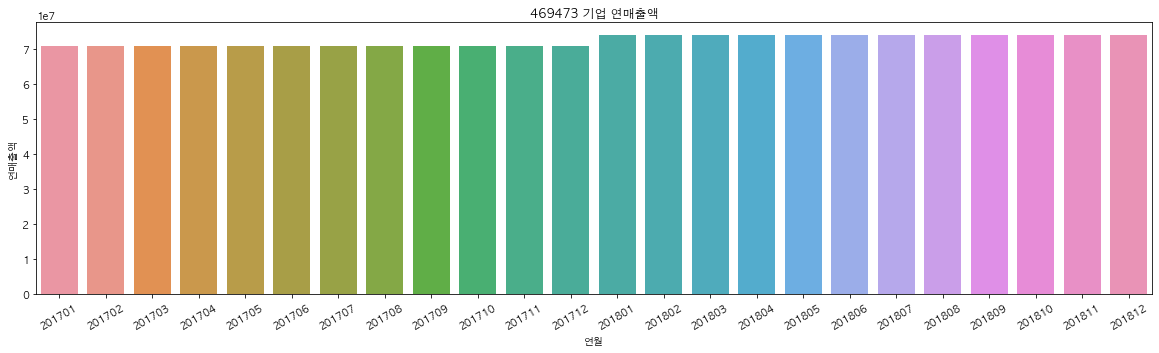

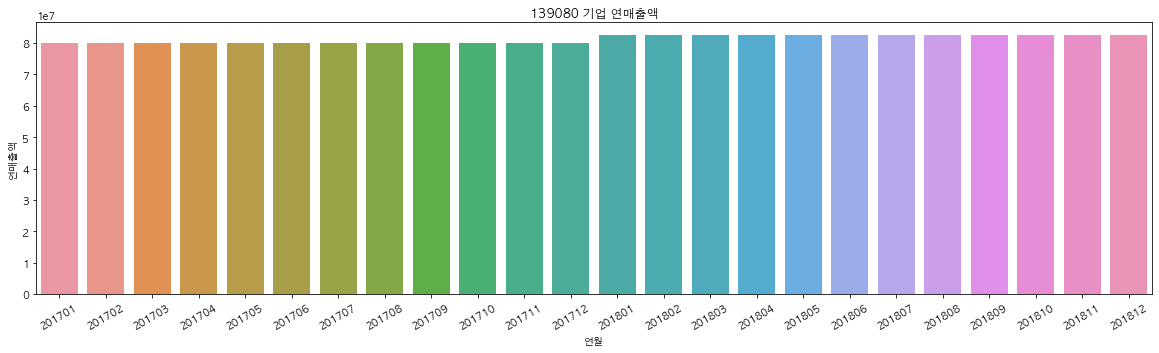

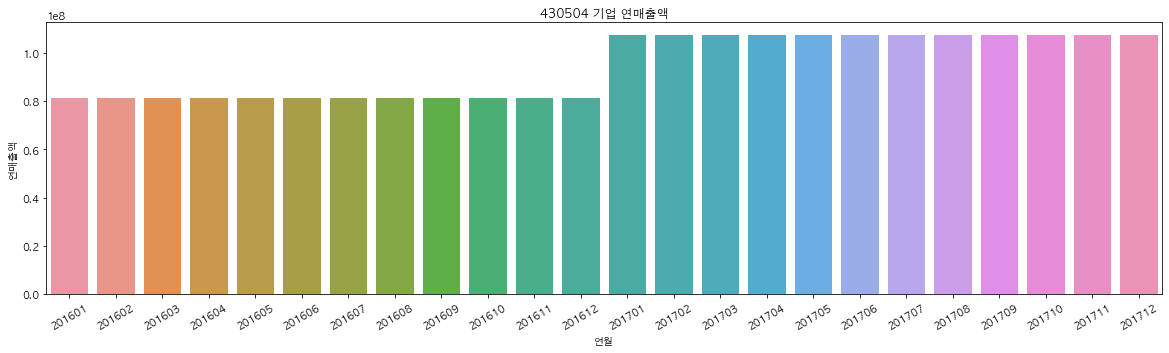

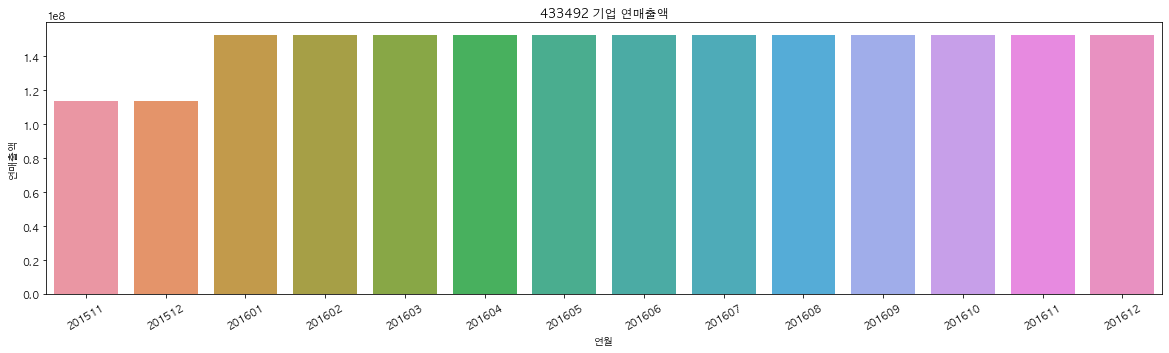

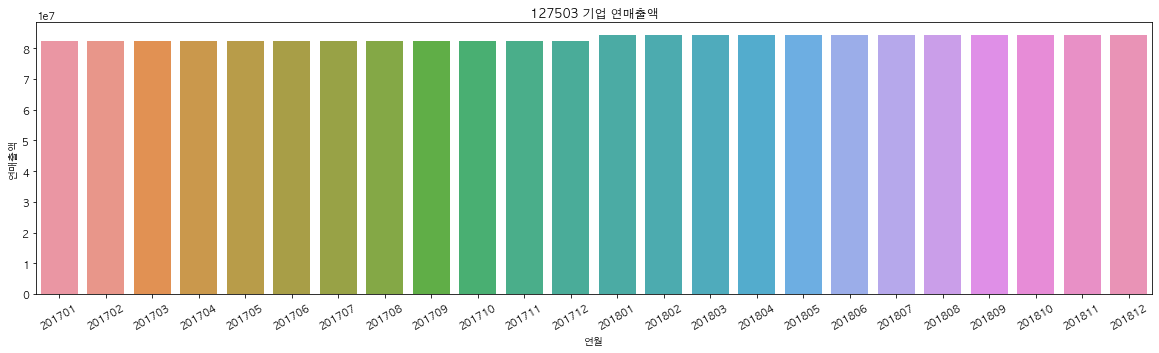

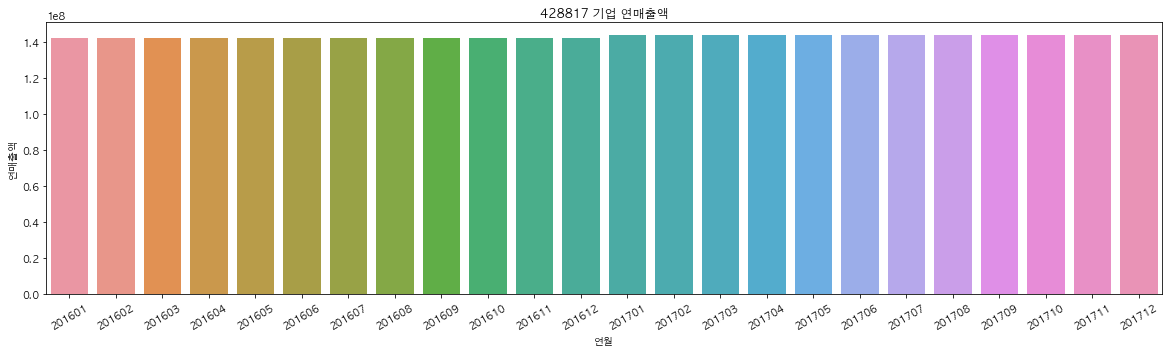

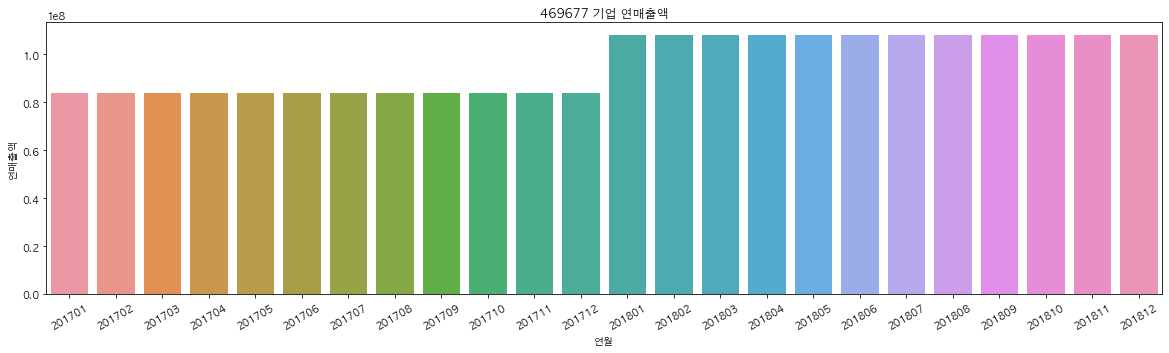

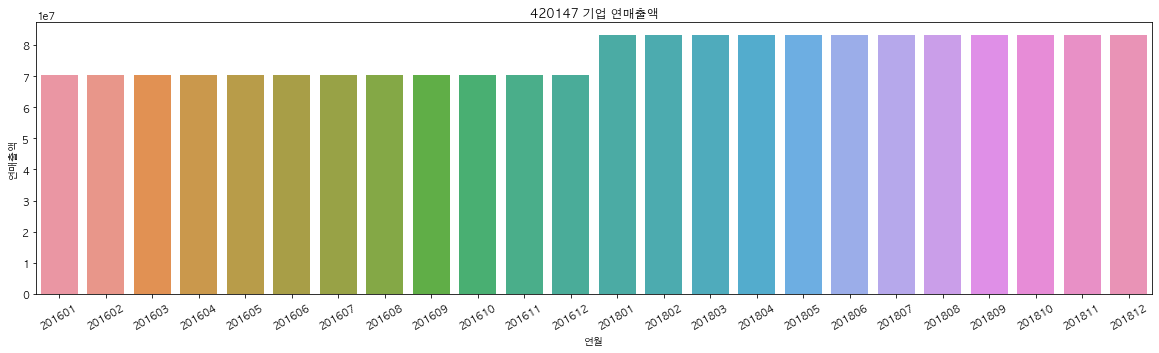

In [113]:
for i in range(15):    
    com_2 = data.loc[data['회사ID']==two_years[i]]

    plt.figure(figsize=(20,5))
    sns.barplot(x=com_2['연월'], y=com_2['연매출액'])
    plt.title('{} 기업 연매출액'.format(two_years[i]))
    plt.ylabel('연매출액')
    plt.xticks(rotation=30)
    plt.show()

### 4개년도 매출액증가 큰것
* 294337
* 232757
* 294530

### 3개년도에서 매출액증가가 큰것
* 430165
* 420046
* 127366

### 2개년도에서 매출액 증가가 큰것
* 없음

### 4개년도 회사

In [115]:
company_294337 = data.loc[data['회사ID'] == 294337]
company_294337

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
56135,294337,102579741,2015,11,244699780,1202,201511
56136,294337,102579741,2015,12,265217820,1318,201512
56137,294337,146274359,2016,1,266212980,1305,201601
56138,294337,146274359,2016,2,274833900,1350,201602
56139,294337,146274359,2016,3,276378820,1350,201603
56140,294337,146274359,2016,4,280566260,1378,201604
56141,294337,146274359,2016,5,287584120,1422,201605
56142,294337,146274359,2016,6,291722360,1450,201606
56143,294337,146274359,2016,7,300951260,1454,201607
56144,294337,146274359,2016,8,311090300,1531,201608


In [116]:
company_232757 = data.loc[data['회사ID'] == 232757]
company_232757

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
40389,232757,164094292,2015,11,5428380,28,201511
40390,232757,164094292,2015,12,6939260,40,201512
40391,232757,167051835,2016,1,7129420,41,201601
40392,232757,167051835,2016,2,6973360,40,201602
40393,232757,167051835,2016,3,6999120,40,201603
40394,232757,167051835,2016,4,6879160,39,201604
40395,232757,167051835,2016,5,6759200,38,201605
40396,232757,167051835,2016,6,6914260,39,201606
40397,232757,167051835,2016,7,6526580,35,201607
40398,232757,167051835,2016,8,6526580,35,201608


In [117]:
company_294530 = data.loc[data['회사ID'] == 294530]
company_294530

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
56249,294530,475824193,2015,11,53255780,268,201511
56250,294530,475824193,2015,12,54380160,275,201512
56251,294530,576297520,2016,1,55766980,284,201601
56252,294530,576297520,2016,2,57390700,295,201602
56253,294530,576297520,2016,3,58255340,300,201603
56254,294530,576297520,2016,4,58014780,298,201604
56255,294530,576297520,2016,5,58851780,303,201605
56256,294530,576297520,2016,6,58494480,301,201606
56257,294530,576297520,2016,7,63153120,299,201607
56258,294530,576297520,2016,8,63105960,299,201608


### 3개년도 회사

In [119]:
company_420165 = data.loc[data['회사ID'] == 420165]
company_420165

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
83396,420165,79499854,2016,1,51070560,154,201601
83397,420165,79499854,2016,2,52503360,160,201602
83398,420165,79499854,2016,3,51531720,158,201603
83399,420165,79499854,2016,4,50536040,155,201604
83400,420165,79499854,2016,5,53124440,161,201605
83401,420165,79499854,2016,6,55690060,169,201606
83402,420165,79499854,2016,7,60246600,173,201607
83403,420165,79499854,2016,8,60262000,174,201608
83404,420165,79499854,2016,9,61872820,179,201609
83405,420165,79499854,2016,10,62263420,180,201610


In [120]:
company_420046 = data.loc[data['회사ID'] == 420046]
company_420046

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
83250,420046,396063681,2016,1,102190840,342,201601
83251,420046,396063681,2016,2,101389240,342,201602
83252,420046,396063681,2016,3,99959240,339,201603
83253,420046,396063681,2016,4,99669260,336,201604
83254,420046,396063681,2016,5,102355540,352,201605
83255,420046,396063681,2016,6,102228820,351,201606
83256,420046,396063681,2016,7,107708040,353,201607
83257,420046,396063681,2016,8,109409100,373,201608
83258,420046,396063681,2016,9,107727040,370,201609
83259,420046,396063681,2016,10,107735140,364,201610


In [121]:
company_127366 = data.loc[data['회사ID'] == 127366]
company_127366

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,연월
6398,127366,74306879,2016,1,79088940,244,201601
6399,127366,74306879,2016,2,80368380,248,201602
6400,127366,74306879,2016,3,81198360,251,201603
6401,127366,74306879,2016,4,79273900,246,201604
6402,127366,74306879,2016,5,80449040,251,201605
6403,127366,74306879,2016,6,80401980,251,201606
6404,127366,74306879,2016,7,81027340,246,201607
6405,127366,74306879,2016,8,82200040,250,201608
6406,127366,74306879,2016,9,82137040,250,201609
6407,127366,74306879,2016,10,81869280,250,201610


#### 매출액이 500억 이상되는 회사들중에서 데이터가 2년이상 있는 회사들로 구분지어봤습니다. 하지만 직원수가 너무 많거나 매출액이 높은 부분은 제외해야 할 부분입니다.